# **Analisis Kebutuhan Transportasi bagi Perempuan: Kasus Layanan Bus Pink TransJakarta**

In [1]:
# library

# !pip install squarify
# !pip install geopandas
# !pip install folium

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
import scipy.stats as stats

from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import normaltest
from statsmodels.stats.diagnostic import lilliefors
from folium.plugins import MarkerCluster

# **Latar Belakang**

Berdasarkan data yang dirilis oleh Badan Pusat Statistik pada akhir tahun lalu, diperkirakan bahwa jumlah penduduk Jakarta akan mencapai puncaknya pada tahun 2040, dengan total populasi sebanyak 11,28 juta jiwa. Dari jumlah tersebut, sekitar 5,44 juta jiwa adalah laki-laki dan 5,84 juta jiwa adalah perempuan. Data ini menunjukkan bahwa jumlah penduduk perempuan di Jakarta sedikit lebih tinggi dibandingkan laki-laki.<br>

Adanya peningkatan minat dari masyarakat dalam menggunakan transportasi umum di Jakarta, pada Januari 2024, tercatat terjadi kenaikan pengguna tranjakarta sebesar 23,76 persen dibandingkan Januari 2023. Hal ini disampaikan oleh Pelaksana Tugas Kepala Badan Pusat Statistik (BPS) DKI Jakarta, Dwi Paramita Dewi yang mengungkapkan, bahwa transjakarta telah menjadi transportasi terfavorit bagi masyarakat Jakarta. ([peminat transportasi publik mengalami peningkatan](https://www.rri.co.id/daerah/579861/pengguna-transportasi-publik-jakarta-naik-23-76-persen ). Sebagai salah satu alternatif utama dan terfavorit transportasi, Transjakarta memiliki peran penting dalam memenuhi kebutuhan penumpang akan pengalaman bertransportasi yang nyaman. Oleh karena itu, optimalisasi kinerja armada dan operasional trayek/halte sangat penting untuk memberikan pengalaman perjalanan yang nyaman, cepat, dan handal kepada para penumpang.
<br>[liputan6: antrian panjang halte transjakarta](https://www.liputan6.com/hot/read/5162877/viral-antrean-panjang-penumpang-di-halte-transjakarta-senayan-bisa-makan-waktu-hingga-2-jam)<br>

Mengamati data tersebut diatas, sebagai data awal penulis menggunakan data statistik pengguna layanan transportasi PT TransJakarta pada April 2023 yang mengungkapkan bahwa pengguna layanan transjakarta perempuan mencapai 53,2% dari total penumpang, sementara penumpang laki-laki sebesar 46,7%. Di antara penumpang tersebut, 2% merupakan lansia. Angka ini menyoroti pentingnya memahami dan merancang fasilitas transportasi yang sesuai dengan kebutuhan khusus dari kelompok penumpang yang dominan ini.<br>

PT TransJakarta telah mengakomodasi kebutuhan khusus penumpang perempuan dengan menyediakan layanan BRT TransJakarta Bus Pink, yang dikhususkan bagi pengguna perempuan. Saat ini, terdapat total 40 armada Bus Pink yang beroperasi di 7 koridor layanan TransJakarta. Setiap bus mampu mengakomodasi hingga 118 penumpang, dengan rincian 38 kursi duduk dan ruang untuk 80 penumpang berdiri.


# **Permasalahan yang perlu dianalisa**

Dengan proporsi penumpang perempuan yang lebih tinggi, penting untuk melindungi mereka dari kasus pelecehan di moda transportasi umum dan hak asasi Perempuan, PT TransJakarta perlu memastikan bahwa fasilitas transportasi yang disediakan memenuhi kebutuhan spesifik perempuan. [pelecehan seksual di transjakarta](https://megapolitan.kompas.com/read/2023/02/22/07422841/miris-pelecehan-kembali-terjadi-di-bus-transjakarta-korban-dan-penumpang?page=all.Ini) termasuk meningkatkan aksesibilitas di halte-halte dengan jumlah penumpang perempuan yang dominan, sehingga fasilitas yang ada sesuai dengan kebutuhan mereka.

Untuk memastikan efektivitas fasilitas dan layanan bus yang disediakan oleh PT TransJakarta bagi penumpang perempuan, sebagai data analis, kita dapat mengidentifikasi Kebutuhan Spesifik Penumpang Perempuan dengan menganalisis pola penggunaan dan kebutuhan penumpang perempuan berdasarkan data, termasuk waktu perjalanan, rute yang paling sering digunakan, dan halte dengan tingkat kepadatan penumpang perempuan tertinggi.

# **Fokus Analisa**

Analisa Layanan Transportasi Transjakarta ini akan menjawab pertanyaan-pertanyaan penelitian sebagai berikut :
1. Bagaimana karakteristik penumpang Transjakarta beserta pola penggunaan pelayanan transportasi transjakarta.
2. Bagaimana persentase penumpang perempuan pada layanan Bus Pink dibandingkan dengan layanan umum TransJakarta di rute Pasar Minggu - Tanah Abang dan Ciledug - Tendean
3. Apakah penempatan rute bus Pink transjakarta telah memenuhi aksesibilitas penumpang perempuan?


# Pemahaman Data

Dalam analisis data, hal pertama yang perlu dilakukan adalah **memahami dataset yang dimiliki**. Tahap ini dilakukan untuk membantu kita menentukan langkah-langkah yang harus kita lakukan serta hal2 yang harus diperhatikan saat melakukan data cleaning dan data analysist. Tahapan dalam data understanding seperti:
- memahami fungsi dari setiap variable,
- pengecekan missing value ataupun duplikat,
- analisa deskriptif,
- outlier,
- korelasinya antar variabel.

untuk itu, kita perlu melakukan pembacaan dan pemahaman terhadap kondisi data kita terlebih dahulu sebelum memasuki bagian analisis data.

Data yang digunakan dapat anda akses pada link berikut:
[Transjakarta](https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo)



## Informasi Umum

pertama, kita harus melakukan pembacaan data ```Transjakarta.csv``` menggunakan library ```pandas``` dan akan disimpan dengan nama variabel *transjakarta*.

In [ ]:
df_Tj = pd.read_csv('Transjakarta.csv')
df_Tj

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


berdasarkan tampilan diatas, terlihat ada beberapa kolom yang tidak ditampilkan. kita perlu menampilkan seluruh kolom untuk lebih mengenal data-data yang kita miliki dengan menggunakan ```
pd.set_option('display.max_columns', None)```

In [ ]:
pd.set_option('display.max_columns',None)
df_Tj

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


dari tampilan diatas, didapatkan bahwa dataset transjakarta terdiri dari **22 kolom** dengan data sebanyak **37.900 baris** data.

Selain itu, dapat diketahui juga deskripsi untuk masing-masing kolom adalah sebagai berikut:

| **Column Name**      | **Description**                                                |
|----------------------|----------------------------------------------------------------|
| transID             | ID transaksi unik untuk setiap transaksi.                      |
| payCardID            | Identifikasi utama pelanggan. Kartu yang digunakan pelanggan untuk masuk dan keluar. |
| payCardBank          | Nama bank penerbit kartu pelanggan.                            |
| payCardName          | Nama pelanggan yang tercantum di kartu.                        |
| payCardSex           | Jenis kelamin pelanggan yang tercantum di kartu.               |
| payCardBirthDate     | Tahun kelahiran pelanggan.                                     |
| corridorID           | ID Koridor / Rute sebagai kunci untuk pengelompokan rute.      |
| corridorName         | Nama Koridor / Rute yang berisi awal dan akhir untuk setiap rute. |
| direction            | Arah dari rute, 0 untuk Pergi, 1 untuk Kembali.                |
| tapInStops           | ID Tap In (masuk) untuk mengidentifikasi nama halte.           |
| tapInStopsName       | Nama Tap In (masuk) Halte di mana pelanggan tap in.            |
| tapInStopsLat        | Lintang dari Halte Tap In.                                     |
| tapInStopsLon        | Bujur dari Halte Tap In.                                       |
| stopStartSeq         | Urutan halte, halte pertama, halte kedua, dll. Terkait dengan arah. |
| tapInTime            | Waktu tap in. Tanggal dan waktu.                               |
| tapOutStops          | ID Tap Out (keluar) untuk mengidentifikasi nama halte.         |
| tapOutStopsName      | Nama Tap Out (keluar) Halte di mana pelanggan tap out.         |
| tapOutStopsLat       | Lintang dari Halte Tap Out.                                    |
| tapOutStopsLon       | Bujur dari Halte Tap Out.                                      |
| stopEndSeq           | Urutan halte, halte pertama, halte kedua, dll. Terkait dengan arah. |
| tapOutTime           | Waktu tap out. Tanggal dan waktu.                              |
| payAmount            | Jumlah yang dibayar pelanggan. Beberapa gratis, beberapa tidak.|


kemudian, kita dapat melakukan pengecekan tipe dan jumlah data yang terisi untuk masing-kolom menggunakan ```transjakarta.info()```

In [ ]:
# ini adalah untuk mengembalikan tampilan default notebook google colab dalam menampilkan jumlah kolom agar tidak terlalu berat
# pd.reset_option('display.max_columns')

df_Tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

selain dapat mengetahui jumlah baris dan kolom, dari transjakarta.info(), kita mendapatkan beberapa informasi lain yaitu:
1. Ada beberapa kolom yang memiliki missing value / jumlah data kurang dari jumlah keseluruhan data yaitu 37.900 baris data.
2. Terdapat 7 kolom dengan tipe data float64 (angka, pecahan)
3. Terdapat 3 kolom dengan tipe data int64 (angka, bilangan bulat)
4. Terdapat 12 kolom dengan tipe data object (string)

berdasarkan informasi ini, kita dapat melihat bahwa **perlu dilakukan format ulang** tipe data pada beberapa kolom seperti data untuk ```payCardID```, maupun ```tapInTime``` dan ```tapOutTime```.


## Format Tipe Data

formatting data:
  - mengubah format data ```payCardID``` menjadi  **String**. Karena ```payCardID``` adalah data berisi identitas pelanggan pada kartu, (membedakan entitas yang berbeda, bukan untuk keperluan komputasi) maka akan lebih baik jika ke tipe string agar proses analisis data lebih tepat
  - mengubah format data ```tapintime``` dan ```tapouttime``` menjadi **datetime**, kemudian membreakdown datanya menjadi lebih rinci berdasarkan informasi yang ada seperti: year,month, day, hour dan minute agar lebih mudah dalam pemahaman data

In [ ]:
df_Tj['tapInTime'] = pd.to_datetime(df_Tj['tapInTime'])
df_Tj['tapOutTime'] = pd.to_datetime(df_Tj['tapOutTime'])
df_Tj['payCardID'] = df_Tj['payCardID'].astype(str)

pada tahap ini akan dibuat copy file dari data asli yang ada agar menghindari overwrite ataupun kesalahan yang tidak dapat dipulihkan, serta melakukan crosscheck dengan raw data akan menjadi lebih mudah.

In [ ]:
transjakarta = df_Tj.copy()

In [ ]:
transjakarta['tapInYear'] = transjakarta['tapInTime'].dt.year
transjakarta['tapInMonth'] = transjakarta['tapInTime'].dt.month
transjakarta['tapInDay'] = transjakarta['tapInTime'].dt.day
transjakarta['tapInHour'] = transjakarta['tapInTime'].dt.hour
transjakarta['tapInMinute'] = transjakarta['tapInTime'].dt.minute
transjakarta['tapOutYear'] = transjakarta['tapOutTime'].dt.year
transjakarta['tapOutMonth'] = transjakarta['tapOutTime'].dt.month
transjakarta['tapOutDay'] = transjakarta['tapOutTime'].dt.day
transjakarta['tapOutHour'] = transjakarta['tapOutTime'].dt.hour
transjakarta['tapOutMinute'] = transjakarta['tapOutTime'].dt.minute

In [ ]:
transjakarta.dtypes

,0
transID,object
payCardID,object
payCardBank,object
payCardName,object
payCardSex,object
payCardBirthDate,int64
corridorID,object
corridorName,object
direction,float64
tapInStops,object


## Unique Value

Kemudian kita dapat melihat beberapa nilai unik untuk tiap kolom untuk mendatkan gambaran lebih luas mengenai nilai dari tiap variabel / kolom dengan menggunakan syntax dibawah ini

In [ ]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in transjakarta.columns :
    listItem.append( [col, transjakarta[col].nunique(), transjakarta[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

dari tabel diatas, didapatkan informasi bahwa data yang dimiliki hanya mencakup pencatatan transaksi pada bulan **April 2023**. Maka, kita dapat melakukan drop kolom yang mencakup data bulan dan tahun karena tidak akan memberikan variasi yang signifikan ataupun informasi yang berguna untuk analisis nantinya.

In [ ]:
transjakarta.drop(columns = ['tapInYear', 'tapInMonth', 'tapOutYear', 'tapOutMonth'], inplace = True)

## Data Hilang

Disini, kita akan melihat jumlah missing value tiap kolom untuk melihat jumlah data hilang dan melihat apakah ada keterkaitan data yang hilang antar kolom.

In [ ]:
def nan_tab(df):
    nan = df.isna().sum()
    percof_missval = pd.DataFrame({'perscentage': round((nan/len(df))*100,2).sort_values(ascending = False)})

    nan_table = pd.concat([nan, percof_missval], axis = 1)
    nan_table.columns = ['jumlah', 'persentase %']

    nan_table = nan_table[nan_table['jumlah'] != 0]
    return nan_table

In [ ]:
nan_tab(transjakarta)

,jumlah,persentase %
corridorID,1257,3.32
corridorName,1930,5.09
tapInStops,1213,3.20
tapOutStops,2289,6.04
tapOutStopsName,1344,3.55
tapOutStopsLat,1344,3.55
tapOutStopsLon,1344,3.55
stopEndSeq,1344,3.55
tapOutTime,1344,3.55
payAmount,1007,2.66


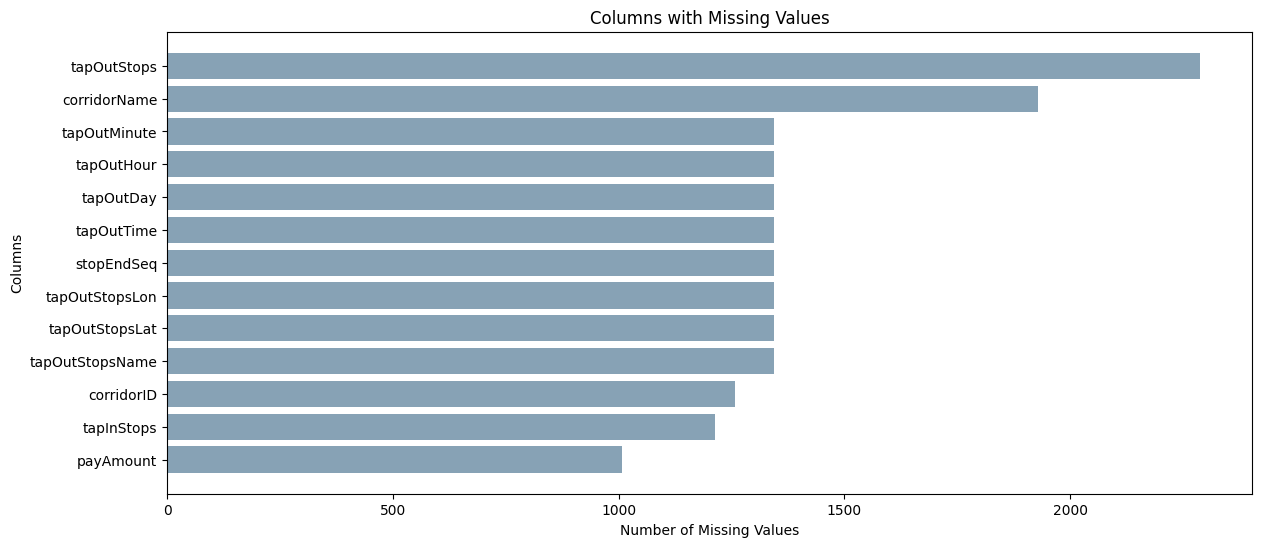

In [ ]:
plt.figure(figsize=(14, 6))
tablex = nan_tab(transjakarta).sort_values(by='jumlah')  # Sort in descending order
plt.barh(tablex.index, tablex['jumlah'], color='#87A2B5')
plt.title('Columns with Missing Values')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()

<Axes: >

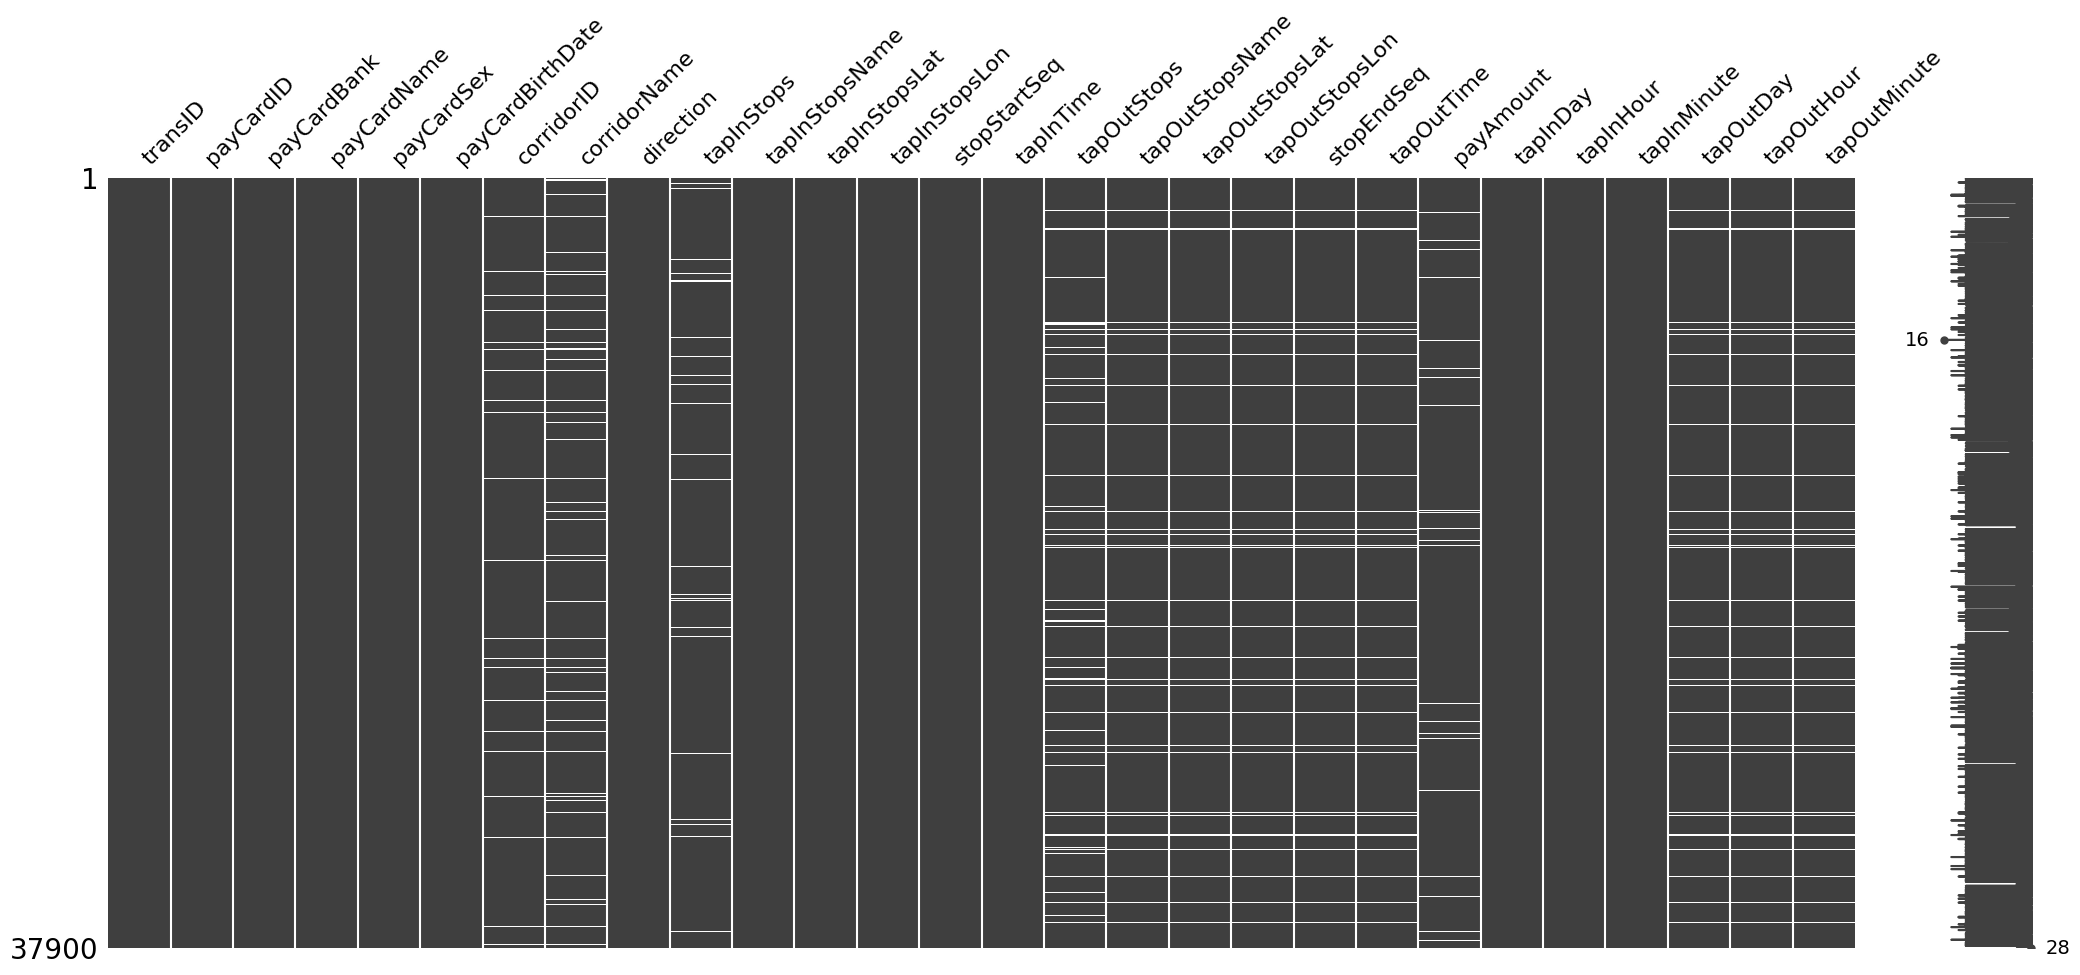

In [ ]:
import missingno
missingno.matrix(transjakarta)

dari penelusuran missing value dengan metode manual dan grafik, dan matrix diatas, didapatkan:
 -  Missing value terbesar terdapat pada variable ```TapOutStop``` dengan jumlah **2289** data kosong dengan persentase **6.04%**.
 - disusul dengan data ```corridorName``` yang hilang sebanyak **1930**	dengan persentase **5.09%**
 - variable dengan missing value terkecil ada pada variabel ```payAmount``` dengan **1007** data kosong, dengan persentase **2.66%**
 - terdapat missing value yang sama pada variabel ```tapOutTime```,```stopEndSeq```	,```tapOutStopsLon```,```tapOutStopsLat```, dan ```tapOutStopsName``` yaitu	**1344** data kosong dengan persentase	**3.55%**
 - terlihat pada matrix missingno bahwa sebagian besar missing value untuk **data keluar** / ```tapOut``` seperti **memiliki keterkaitan** satu sama lain (antar kolom ```tapOut```). Namun, hal ini perlu dilakukan analisa lebih lanjut nantinya.

## Data Duplikat

pada tahap ini akan dilakukan pengecekan, apakah terdapat data duplikat dari dataset yang dimiliki untuk menjaga integritas data dan menghindari kesalaan analisis.

In [ ]:
dupe_num = transjakarta.duplicated().sum()

if dupe_num == 0:
  print(f'Tidak ditemukan adanya set data duplikat')
else:
  print(f'Ditemukan set data duplikat sebanyak {dupe_num} data')

Tidak ditemukan adanya set data duplikat


berdasarkan hasil diatas, didapatkan bahwa pada dataset **Transjakarta.csv** **tidak ditemukan adanya set-row duplikat**. <br>Namun, kita perlu melakukan pengecekan lebih dalam terkait duplikasi yang mungkin terjadi dari kemungkinan data-data yang saling merepresentasikan data lainya.

In [ ]:
#ffungsi pengecekan duplikat
def data_dupe(data,tuju,pref):
    # Menghitung jumlah kemunculan corridorName di setiap corridorID
    corridor_counts = data.groupby([tuju, pref]).size().reset_index(name='value_counts')

    # Mengelompokkan berdasarkan corridorName dan membuat daftar corridorID terkait
    corridor_names_with_ids = corridor_counts.groupby(pref).agg(
        lists=(tuju, lambda x: ', '.join(x.astype(str).unique())),
        total_counts=('value_counts', 'sum'),
        value_counts_per_corridorID=('value_counts', lambda x: ', '.join(x.astype(str)))
    ).reset_index()

    # Filter corridorNames yang memiliki > 1 corridorID
    corridor_names_with_multiple_ids = corridor_names_with_ids[corridor_names_with_ids['lists'].str.count(',') > 0]
    return corridor_names_with_multiple_ids

fungsi diatas adalah fungsi yang dapat mengecek nilai apa saja yang mengisi sebuah variabel beserta jumlah (count) datanya terhadap suatu variabel yang dicari.

### CorridorID vs Corridor Name

pada tahap ini akan dilakukan pengecekan data duplikat dari **corridorID vs corridorName** untuk mengetahui, **apakah setiap corridorName (nama koridor/ rute) hanya mewakili 1 corridorID saja) saja**.

In [ ]:
dupe_cID_CN = data_dupe(transjakarta,'corridorID','corridorName')
dupe_cID_CN

,corridorName,lists,total_counts,value_counts_per_corridorID
12,Blok M - Kota,"1, M1",291,"230, 61"
55,Kalideres - Bundaran HI via Veteran,"3, M3",331,"127, 204"
88,Matraman Baru - Ancol,"5, M5",261,"246, 15"
108,Pinang Ranti - Pluit,"9, M9",208,"59, 149"
116,Pulo Gadung - Monas,"2, M2",339,"279, 60"


dari data diatas, dapat dilihat bahwa terdapat **5 corridorName yang memiliki lebih dari 1 corridorID**.
Dalam domain knowlagenya, memang koridor tersebut memiliki nama kiridor yang sama, namun memiliki jam operasional yang berbeda. Koridor dengan kode M adalah layanan transjakarta AMARI yang beroperasi pada nama rute yang sama pada malam hari ([Info AMARI](https://transjakarta.co.id/rute)). Hal ini akan menjadi perhatian saat melakukan handling dupelicate.

In [ ]:
def check_multiple_stops(data, stop_column, lat_column, lon_column):
    corridor_counts = data.groupby([stop_column, lat_column, lon_column]).size().reset_index(name='value_counts')

    # Mengelompokkan berdasarkan lat dan lon untuk membuat daftar semua stop terkait
    latlon_with_ids = corridor_counts.groupby([lat_column, lon_column]).agg(
        stops_list=(stop_column, lambda x: ', '.join(x.astype(str).unique())),
        total_counts=('value_counts', 'sum'),
        value_counts_per_stop=('value_counts', lambda x: ', '.join(x.astype(str)))
    ).reset_index()

    # Memfilter untuk koordinat yang terkait dengan lebih dari 1 stop
    multiple_stops = latlon_with_ids[latlon_with_ids['stops_list'].str.count(',') > 0]

    # Menampilkan hasil jika ada multiple stops untuk satu koordinat
    if not multiple_stops.empty:
        return multiple_stops
    else:
        print(f'Tidak ada data duplikat koordinat terhadap {stop_column}.\nSetiap {stop_column} memiliki koordinat lokasi yang unik')
        return pd.DataFrame()  # Mengembalikan DataFrame kosong jika tidak ada duplikat

### tapStops vs tapStopsName

#### tapOutStops vs tapOutStopsName

pada tahap ini akan dilakukan pengecekan data duplikat dari **tap-Stops vs tap-StopsName** untuk mengetahui, **apakah setiap tap-stopsName (nama halte) hanya mewakili 1 tap-Stops (kode halte) saja**.

In [ ]:
data_dupe(transjakarta,'tapOutStops','tapOutStopsName')

,tapOutStopsName,lists,total_counts,value_counts_per_corridorID
186,Dukuh Atas 2,"P00052, P00298",48,"28, 20"


In [ ]:
def calculate_counts(df, stop_code, stop_name,x,y,lat,lon):
    filtered_data = df[df[x] == stop_code][[lat, lon]]
    filtered_data[x] = stop_code
    filtered_data[y] = stop_name
    return filtered_data.value_counts().reset_index(name='count')

counts_P00052 = calculate_counts(transjakarta, 'P00052', 'Dukuh Atas 2','tapOutStops','tapOutStopsName','tapOutStopsLat', 'tapOutStopsLon')
counts_P00298 = calculate_counts(transjakarta, 'P00298', 'Dukuh Atas 2','tapOutStops','tapOutStopsName','tapOutStopsLat', 'tapOutStopsLon')

combined_countsOut = pd.concat([counts_P00052, counts_P00298], ignore_index=True)

combined_countsOut = combined_countsOut.groupby(['tapOutStopsName','tapOutStops','tapOutStopsLat', 'tapOutStopsLon'])['count'].sum().reset_index()
combined_countsOut

,tapOutStopsName,tapOutStops,tapOutStopsLat,tapOutStopsLon,count
0,Dukuh Atas 2,P00052,-6.203276,106.823770,28
1,Dukuh Atas 2,P00298,-6.204494,106.823327,20


dari hasil diatas, tapOutStopsName **Dukuh Atas 2** mewakili **2 tapOutStops yang berbeda***. karena terdapatnya nilai **tidak unik::** ini, maka data ini harus dihandle terlebih dahulu nantinya.

#### tapinstops tapinstopsName

In [ ]:
data_dupe(transjakarta,'tapInStops','tapInStopsName')

,tapInStopsName,lists,total_counts,value_counts_per_corridorID
208,Dukuh Atas 2,"P00052, P00298",21,"20, 1"


In [ ]:
counts_P00052 = calculate_counts(transjakarta, 'P00052', 'Dukuh Atas 2','tapInStops','tapInStopsName','tapInStopsLat', 'tapInStopsLon')
counts_P00298 = calculate_counts(transjakarta, 'P00298', 'Dukuh Atas 2','tapInStops','tapInStopsName','tapInStopsLat', 'tapInStopsLon')

combined_countsIn = pd.concat([counts_P00052, counts_P00298], ignore_index=True)

combined_countsIn = combined_countsIn.groupby(['tapInStopsName','tapInStops','tapInStopsLat', 'tapInStopsLon'])['count'].sum().reset_index()
combined_countsIn

,tapInStopsName,tapInStops,tapInStopsLat,tapInStopsLon,count
0,Dukuh Atas 2,P00052,-6.203276,106.823770,20
1,Dukuh Atas 2,P00298,-6.204494,106.823327,1


sams seperti data tapOutStops, pada tapInStopsName **Dukuh Atas 2 juga mewakili 2 data tapInStops yang berbeda**. Karena terdapatnya **nilai tidak unik**, maka data ini harus melalui proses handle duplicate terlebih dahulu sebelum digunaakan untuk analisis.

### tapStops Vs koordinat

#### tapOutStops Vs Koordinat Out

pada tahap ini akan dilakukan pengecekan data duplikat dari **tap-Stops vs koordinat** untuk mengetahui **apakah setiap koordinat yang ada hanya mewakili 1 tap-stops saja**

In [ ]:
result_tapout = check_multiple_stops(transjakarta, 'tapOutStops', 'tapOutStopsLat', 'tapOutStopsLon')
result_tapout

Tidak ada data duplikat koordinat terhadap tapOutStops.
Setiap tapOutStops memiliki koordinat lokasi yang unik


""


#### tapInStops Vs Koordinat In

In [ ]:
result_tapin = check_multiple_stops(transjakarta, 'tapInStops', 'tapInStopsLat', 'tapInStopsLon')
result_tapin

Tidak ada data duplikat koordinat terhadap tapInStops.
Setiap tapInStops memiliki koordinat lokasi yang unik


""


dari kedua hasil pengecekan duplikat diatas berdasaarkan koordinat dan ID halte, didapatkan bahwa **setiap koordinat memiliki nilai unik untuk setiap halte yang ada** (1 koordinat hanya mewakili 1 halte saja). sehingga data ini dapat dijadikan informasi tambahan dalam handling missing value.  

### payAmount vs corridorID

pada tahap ini akan dilakukan pengecekan data duplikat dari **corridorID vs corridorName** untuk mengetahui, **apakah setiap corridorID (kode koridor/ rute) hanya memiliki 1 nilai tafir saja**.

In [ ]:
pA_dupe = data_dupe(transjakarta, 'payAmount', 'corridorID',)
pA_dupe

,corridorID,lists,total_counts,value_counts_per_corridorID


dari hasil pengecekan duplikat diatas antara corridorID dan payAMount, terlihat tidak memberikan outoput, yang berarti  bahwa setiap corridorID hanya memiliki 1 nilai payAmount saja.

## Variabel Numerik

Pada bagian ini, kita harus **memastikan** bahwa varabel yang ditinjau adalah **variabel numerik**.


In [ ]:
tj_num = transjakarta.select_dtypes(include= 'number')
tj_num

,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount,tapInDay,tapInHour,tapInMinute,tapOutDay,tapOutHour,tapOutMinute
0,2008,1.0,-6.184631,106.84402,7,-6.203101,106.85715,12.0,3500.0,3,5,21,3.0,6.0,0.0
1,1997,0.0,-6.228700,106.83302,13,-6.217152,106.81892,21.0,3500.0,3,5,42,3.0,6.0,40.0
2,1992,0.0,-6.133132,106.81435,38,-6.133731,106.81475,39.0,3500.0,3,5,59,3.0,6.0,50.0
3,1978,0.0,-6.195743,106.93526,23,-6.183068,106.93194,29.0,3500.0,3,5,44,3.0,6.0,28.0
4,1982,0.0,-6.149650,106.88900,5,-6.135355,106.81143,15.0,3500.0,3,6,17,3.0,6.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,2004,1.0,-6.196892,106.82309,2,-6.290967,106.82365,13.0,3500.0,21,18,18,21.0,19.0,55.0
37896,1974,1.0,-6.290154,106.88116,1,-6.291075,106.88634,2.0,3500.0,18,21,52,18.0,22.0,28.0
37897,1976,1.0,-6.216247,106.81676,12,-6.370321,106.89628,14.0,20000.0,4,10,29,4.0,13.0,27.0
37898,1976,1.0,-6.188656,106.80954,33,-6.188861,106.81135,34.0,0.0,15,19,59,15.0,20.0,27.0


### Statistika deskriptif

In [ ]:
tj_num.describe()

,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount,tapInDay,tapInHour,tapInMinute,tapOutDay,tapOutHour,tapOutMinute
count,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000
mean,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683,15.794697,12.519129,29.490818,15.796203,13.720320,29.503419
std,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592,7.723495,5.717353,17.328349,7.719961,5.948524,17.320662
min,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000,10.000000,7.000000,14.000000,10.000000,8.000000,15.000000
50%,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000,16.000000,13.000000,30.000000,16.000000,14.000000,29.000000
75%,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000,22.000000,17.000000,45.000000,21.000000,19.000000,44.250000
max,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000,30.000000,21.000000,59.000000,30.000000,23.000000,59.000000


berdasarkan tabel diatas, didapatkan beberapa informasi bahwa:
- Rentang kelahiran:  
  - Tahun kelahiran pengguna berkisar antara 1990-2012. yang berarti pengguna layanan Transjakarta terdiri dari kelompok usia yang sangat luas, mulai dari anak-anak (11 tahun pada 2023) hingga lansia (77 tahun)
  - Rata-rata pengguna transjakarta lahir pada tahun 1990 yang berarti pada tahun ini saat pencatatan data, 2023, rata-rata pengguna berusia 33 tahun
- Arah perjalanan: Kolom direction memiliki nilai rata-rata sekitar 0.5, yang mengindikasikan bahwa data ini hampir seimbang antara dua arah perjalanan (0 untuk Go dan 1 untuk arah Back).
- Data Geospasial
  - Data Lokasi: Nilai lintang (tapInStopsLat, tapOutStopsLat) dan bujur (tapInStopsLon, tapOutStopsLon) cenderung berkumpul di sekitar koordinat tertentu.
  - Konsistensi: Rata-rata untuk lokasi tap-in dan tap-out cukup dekat, menunjukkan bahwa halte-halte tersebut relatif terpusat di area yang sama.
- Tarif perjalanan:
  - Min tarif: Rp.0,- (nol rupiah),
  - Max tarif: 20000  
  - Tarif paling umum: Rp.3500,- (tiga ribu lima ratus rupiah). Dilihat dari persentil ke-50 dan ke-75 yang menunjukkan nilai Rp.3500, yang mengindikasikan bahwa ini adalah tarif yang paling umum dibayar oleh pengguna

### Distribusi data

Dalam **pengecekan distribusi**, data yang dapat dianalisis adalah **data** **numerik continu**. Namun, dapat dikecualikan jika data diskrit dianggap cukup berkaitan dan dapat memberikan wawasan tentang pola dan perilaku pengguna.

Maka, berdasarkan kolom numerik yang dimiliki, kolom dengan tipe data numerik continu yang akan digunakan adalah `:
  - ```TapInStopsLat```,
  - ```tapInStopsLon```,
  -  ```tapOutStopsLa```,
  - ```tapOutStopsLon```

dan tambahan beberapa data numerik diskrit yaitu:
  - ```payCardBirthDate```,
  - ```stopStartSeq```,
  - ```stopEndSeq```
  - ```PayAmount```
  yang dianggap dapat memberikan informasi tambahan dalam pengambilan keputusan nantinya karena berhubungan dengan pengguna dan keputusan operasional.

dengan demikian, hanya data2 diataslah yang akan menjadi bagian dari analisis distribusi  

In [ ]:
tj_num_cont = tj_num.drop(columns = ['direction'])
tj_num_cont

,payCardBirthDate,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount,tapInDay,tapInHour,tapInMinute,tapOutDay,tapOutHour,tapOutMinute
0,2008,-6.184631,106.84402,7,-6.203101,106.85715,12.0,3500.0,3,5,21,3.0,6.0,0.0
1,1997,-6.228700,106.83302,13,-6.217152,106.81892,21.0,3500.0,3,5,42,3.0,6.0,40.0
2,1992,-6.133132,106.81435,38,-6.133731,106.81475,39.0,3500.0,3,5,59,3.0,6.0,50.0
3,1978,-6.195743,106.93526,23,-6.183068,106.93194,29.0,3500.0,3,5,44,3.0,6.0,28.0
4,1982,-6.149650,106.88900,5,-6.135355,106.81143,15.0,3500.0,3,6,17,3.0,6.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,2004,-6.196892,106.82309,2,-6.290967,106.82365,13.0,3500.0,21,18,18,21.0,19.0,55.0
37896,1974,-6.290154,106.88116,1,-6.291075,106.88634,2.0,3500.0,18,21,52,18.0,22.0,28.0
37897,1976,-6.216247,106.81676,12,-6.370321,106.89628,14.0,20000.0,4,10,29,4.0,13.0,27.0
37898,1976,-6.188656,106.80954,33,-6.188861,106.81135,34.0,0.0,15,19,59,15.0,20.0,27.0


#### **Histogram**

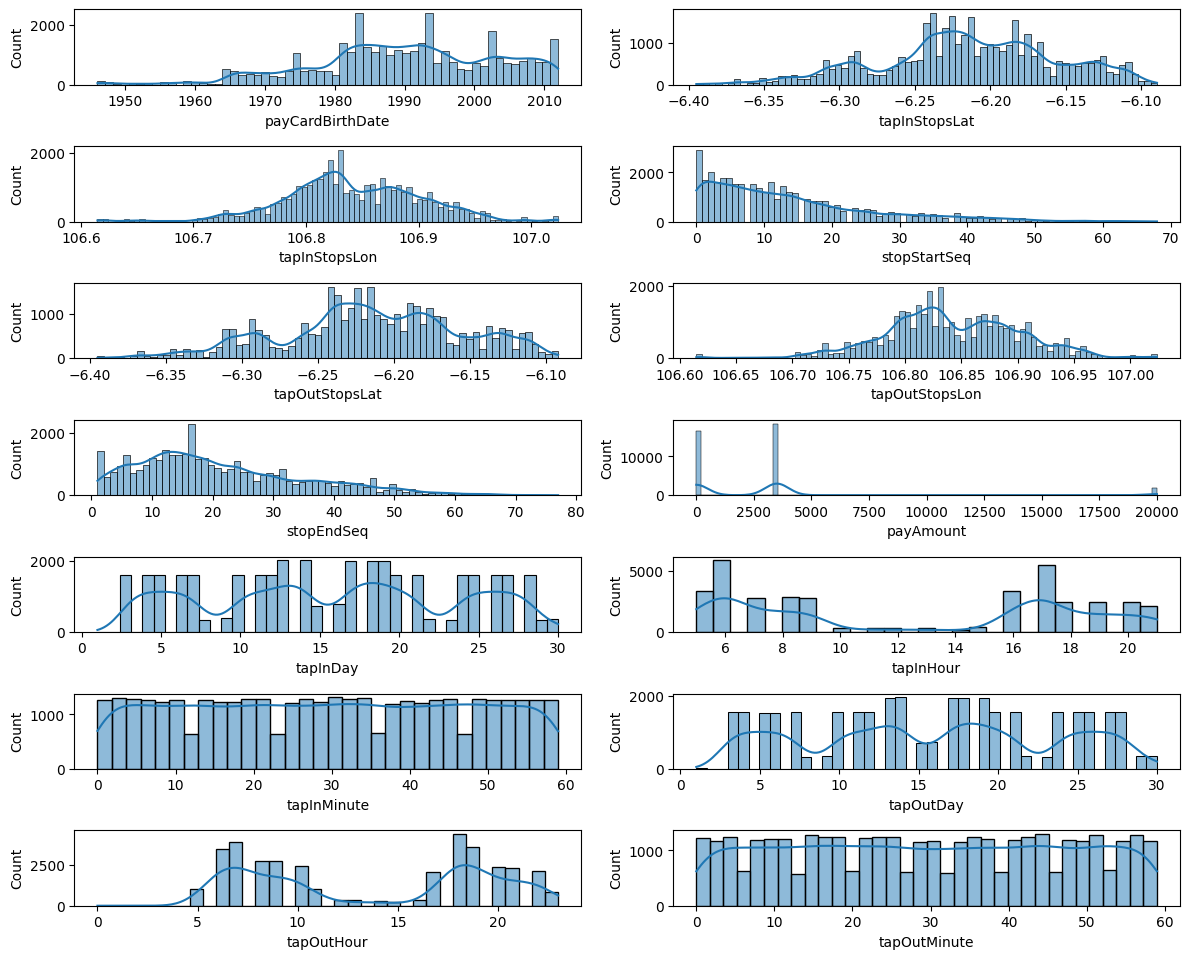

In [ ]:
# Untuk mengganti ukuran pigura
plt.figure(figsize = (12,12))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in tj_num_cont.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(9,2,posisi)
    sns.histplot(tj_num_cont[setiap_kolom], kde = True)
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

Berdasarkan grafik histogram, dapat dilihat bahwa setiap kolom memiliki distribusi **tidak normal**.
Namun pada grafik diatas juga didapatkan informasi bahwa:
  - **tapDay**:
  
  Hari dalam Bulan: Data hari menunjukkan distribusi yang cukup merata sepanjang bulan yang tersedia (1–30), yang menandakan penggunaan yang konsisten setiap hari dalam bulan tersebut.
  - **tapHour**:
    - terlihat pada ```tapInHour``` terdapat peak hour pada pukul
  6-8 pagi dan sore hari sekitar pukul 16-18 sore.
    - ```tapOutHour```mengalami peningkatan dari pukul 5 - 7 pagi dan meningkat kembali pada pukul 4 sore - 6 malam.
    - Pada siang hari, terutama antara jam 10-15, ada penurunan signifikan dalam jumlah tap-in dan tap-out.
  - **Ketidaksesuaian Distribusi**:
   
   pada pagi hari (jam 6-8), tap-in lebih tinggi, sementara tap-out lebih tinggi pada malam hari (jam 17-20). Ini mungkin menunjukkan ketidaksesuaian waktu perjalanan, di mana pengguna mungkin melakukan perjalanan lebih awal atau lebih lambat dari waktu yang diperkirakan, atau mungkin ada durasi perjalanan yang cukup lama.


#### Uji Statistik

Dalam Uji Statistik untuk Distribusi Normal, perlu dilakukan **drop data kosong (NaN) - Sementara** untuk menjaga akurasi perhitungan, mencegah error dalam perhitungan dan algoritma, serta memastikan interpretasi yang valid dan hasil yang dapat diandalkan

In [ ]:
numerik = tj_num_cont.copy()
numerik.dropna(inplace = True)
numerik

,payCardBirthDate,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount,tapInDay,tapInHour,tapInMinute,tapOutDay,tapOutHour,tapOutMinute
0,2008,-6.184631,106.84402,7,-6.203101,106.85715,12.0,3500.0,3,5,21,3.0,6.0,0.0
1,1997,-6.228700,106.83302,13,-6.217152,106.81892,21.0,3500.0,3,5,42,3.0,6.0,40.0
2,1992,-6.133132,106.81435,38,-6.133731,106.81475,39.0,3500.0,3,5,59,3.0,6.0,50.0
3,1978,-6.195743,106.93526,23,-6.183068,106.93194,29.0,3500.0,3,5,44,3.0,6.0,28.0
4,1982,-6.149650,106.88900,5,-6.135355,106.81143,15.0,3500.0,3,6,17,3.0,6.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,2004,-6.196892,106.82309,2,-6.290967,106.82365,13.0,3500.0,21,18,18,21.0,19.0,55.0
37896,1974,-6.290154,106.88116,1,-6.291075,106.88634,2.0,3500.0,18,21,52,18.0,22.0,28.0
37897,1976,-6.216247,106.81676,12,-6.370321,106.89628,14.0,20000.0,4,10,29,4.0,13.0,27.0
37898,1976,-6.188656,106.80954,33,-6.188861,106.81135,34.0,0.0,15,19,59,15.0,20.0,27.0


In [ ]:
numerik.isna().sum()

,0
payCardBirthDate,0
tapInStopsLat,0
tapInStopsLon,0
stopStartSeq,0
tapOutStopsLat,0
tapOutStopsLon,0
stopEndSeq,0
payAmount,0
tapInDay,0
tapInHour,0


terlihat pada tabel diatas bahwa data yang akan digunakan suda tidak berisi missing value<br>
Pada tahap ini akan dilakukan pengecekan normalitas distribusi dengan menggunakan 4 metode yaitu:
- D'Agostino-Pearson
- Kolmogorov-Smirnov
- Lilliefors
- Shapiro-Wilk

In [ ]:
results = []
def norm_test(x, y, data, z, results):
    for tiap_kolom in y.columns:
        stat, pval = z(data[tiap_kolom])

        if pval < 0.05:
            conclusion = 'TIDAK NORMAL'
        else:
            conclusion = 'NORMAL'

        results.append({
            "kolom": tiap_kolom,
            "metode": x,
            "kesimpulan": conclusion,
            "p-value": pval
        })

tests = [
    {"name": "Kolmogorov-Smirnov", "func": lambda x: stats.kstest(x, 'norm')},
    {"name": "Shapiro-Wilk", "func": stats.shapiro},
    {"name": "D'Agostino-Pearson", "func": stats.normaltest},
    {"name": "Lilliefors", "func": lilliefors}
]

for test in tests:
    norm_test(test["name"], numerik, numerik, test["func"], results)

dfresults = pd.DataFrame(results)
pivot_table = dfresults.pivot(index='kolom', columns='metode', values=['kesimpulan', 'p-value'])
pivot_table

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35588.
  res = hypotest_fun_out(*samples, **kwds)


kesimpulan                                   \
metode           D'Agostino-Pearson Kolmogorov-Smirnov    Lilliefors   
kolom                                                                  
payAmount         TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   
payCardBirthDate  TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   
stopEndSeq        TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   
stopStartSeq      TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   
tapInDay          TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   
tapInHour         TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   
tapInMinute       TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   
tapInStopsLat     TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   
tapInStopsLon     TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   
tapOutDay         TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   
tapOutHour        TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   
tapOutMinute      TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   
tapOutStopsLat    TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   
tapOutStopsLon    TIDAK NORMAL       TIDAK NORMAL       TIDAK NORMAL   

                                          p-value                     \
metode            Shapiro-Wilk D'Agostino-Pearson Kolmogorov-Smirnov   
kolom                                                                  
payAmount         TIDAK NORMAL  0.0                0.0                 
payCardBirthDate  TIDAK NORMAL  0.0                0.0                 
stopEndSeq        TIDAK NORMAL  0.0                0.0                 
stopStartSeq      TIDAK NORMAL  0.0                0.0                 
tapInDay          TIDAK NORMAL  0.0                0.0                 
tapInHour         TIDAK NORMAL  0.0                0.0                 
tapInMinute       TIDAK NORMAL  0.0                0.0                 
tapInStopsLat     TIDAK NORMAL  0.0                0.0                 
tapInStopsLon     TIDAK NORMAL  0.0                0.0                 
tapOutDay         TIDAK NORMAL  0.0                0.0                 
tapOutHour        TIDAK NORMAL  0.0                0.0                 
tapOutMinute      TIDAK NORMAL  0.0                0.0                 
tapOutStopsLat    TIDAK NORMAL  0.0                0.0                 
tapOutStopsLon    TIDAK NORMAL  0.0                0.0                 

                                          
metode           Lilliefors Shapiro-Wilk  
kolom                                     
payAmount         0.001      0.0          
payCardBirthDate  0.001      0.0          
stopEndSeq        0.001      0.0          
stopStartSeq      0.001      0.0          
tapInDay          0.001      0.0          
tapInHour         0.001      0.0          
tapInMinute       0.001      0.0          
tapInStopsLat     0.001      0.0          
tapInStopsLon     0.001      0.0          
tapOutDay         0.001      0.0          
tapOutHour        0.001      0.0          
tapOutMinute      0.001      0.0          
tapOutStopsLat    0.001      0.0          
tapOutStopsLon    0.001      0.0

Berdasarkan hasil pengujian distribusi normal dengan 4 metode (**D'Agostino-Pearson,	Kolmogorov-Smirnov, Lilliefors, Shapiro-Wilk**) seluruh varuabel memiliki distribusi **tidak normal**

### Outlier

#### Boxplot

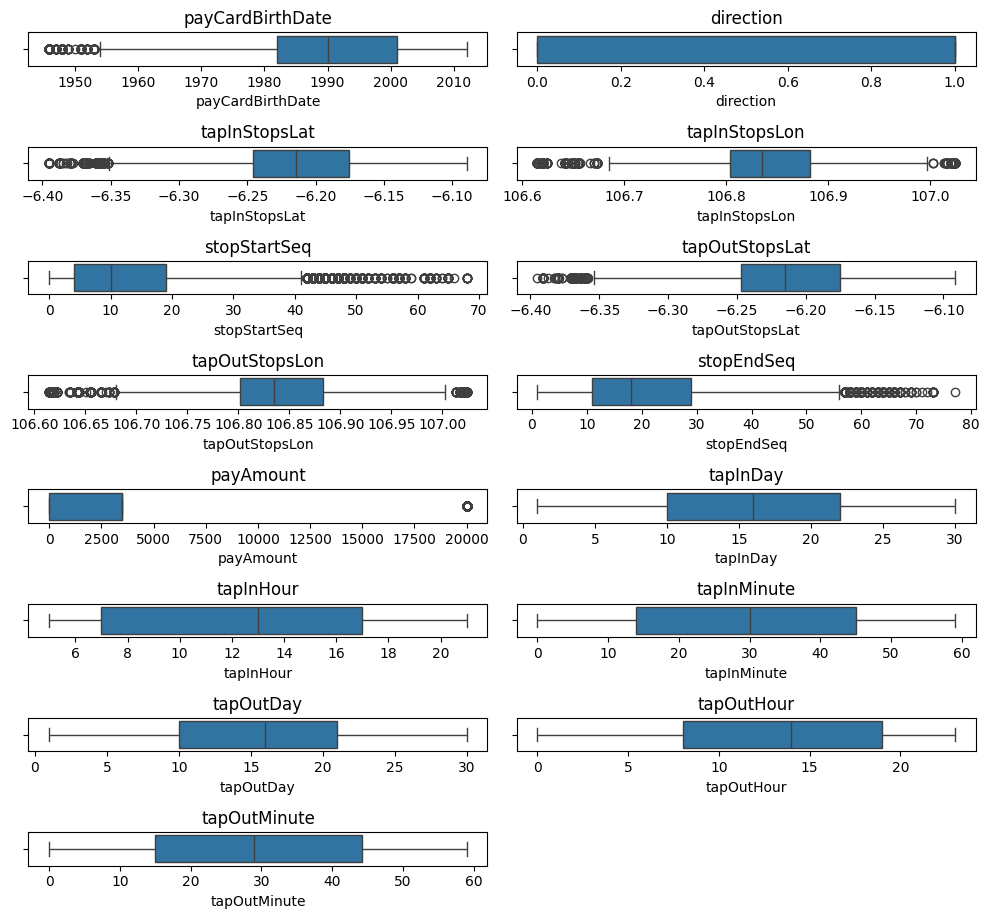

In [ ]:
posisi = 1
plt.figure(figsize = (10,10))

for tiap_kolom in tj_num.columns:
  plt.subplot(9,2,posisi)
  sns.boxplot(transjakarta[tiap_kolom],orient = 'h')
  plt.title(tiap_kolom)
  posisi += 1
  plt.tight_layout()

#### IQR dan Z Score

In [ ]:
def calculate_outliers_iqr(data):
    q3 = data.quantile(0.75)
    q1 = data.quantile(0.25)
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = q3 + whis
    lower_bound = q1 - whis
    outliers = len(data[(data > upper_bound) | (data < lower_bound)])
    percent_outliers = round((outliers / len(data)) * 100, 2)
    return outliers, percent_outliers

def calculate_outliers_zscore(data):
    std = data.std()
    mean = data.mean()
    zscore = abs((data - mean) / std)
    outliers = len(zscore[zscore > 2])
    percent_outliers = round((outliers / len(data)) * 100, 2)
    return outliers, percent_outliers

list_outliers_iqr = []
list_persentase_outliersiqr = []
list_outliers_zs = []
list_persentase_outlierszs = []
jlh_data = []

for setiap_kolom in tj_num.columns:
    data = tj_num[setiap_kolom]
    outliers_iqr, percent_outliers_iqr = calculate_outliers_iqr(data)
    outliers_zscore, percent_outliers_zscore = calculate_outliers_zscore(data)
    list_outliers_iqr.append(outliers_iqr)
    list_persentase_outliersiqr.append(percent_outliers_iqr)
    jlh_data.append(len(data))
    list_outliers_zs.append(outliers_zscore)
    list_persentase_outlierszs.append(percent_outliers_zscore)

outliers = pd.DataFrame({
    'kolom': tj_num.columns,
    'panjang data': jlh_data,
    'jlh outliers IQR': list_outliers_iqr,
    '%outliers IQR': list_persentase_outliersiqr,
    'jlh outliers Zscore' : list_outliers_zs,
    '%outliers ZScore': list_persentase_outlierszs
    })
outliers

,kolom,panjang data,jlh outliers IQR,%outliers IQR,jlh outliers Zscore,%outliers ZScore
0,payCardBirthDate,37900,340,0.90,782,2.06
1,direction,37900,0,0.00,0,0.00
2,tapInStopsLat,37900,411,1.08,1390,3.67
3,tapInStopsLon,37900,558,1.47,1387,3.66
4,stopStartSeq,37900,1543,4.07,2055,5.42
5,tapOutStopsLat,37900,359,0.95,1241,3.27
6,tapOutStopsLon,37900,449,1.18,1438,3.79
7,stopEndSeq,37900,583,1.54,1800,4.75
8,payAmount,37900,1742,4.60,1742,4.60
9,tapInDay,37900,0,0.00,0,0.00


Dari kedua hasil diatas, dapat diketahui bahwa:
  1. Outliers dengan Boxplot dapat memberikan gambaran visual mengenai persebaran dari outliers terhadap data
  2.  Dari table IQR dan Zscore sebagian besar data memiliki outliers menurut pendekatan statistika (kecuali data terkait wakti ```tapin``` dan ```tapout```)
  3. Terdapat perbedaan jumlah outliers pada uji IQR dan ZScore dikarenakan adanya perbedaan cara kerja dan sensitivitas dari kedua metode tersebut.

Namun, dapat disimpulkan bahwa, didalam dataset Transjakarta.csv terdapat outliers paling besar pada variabel ```stopEndSeq``` yaitu **4.75%** dari data dan yang terkecil pada variabel  ```payCardBirthDate``` sebesar **2.06%** sedangkan data ```direction``` tidak memiliki outliers.

### Korelasi

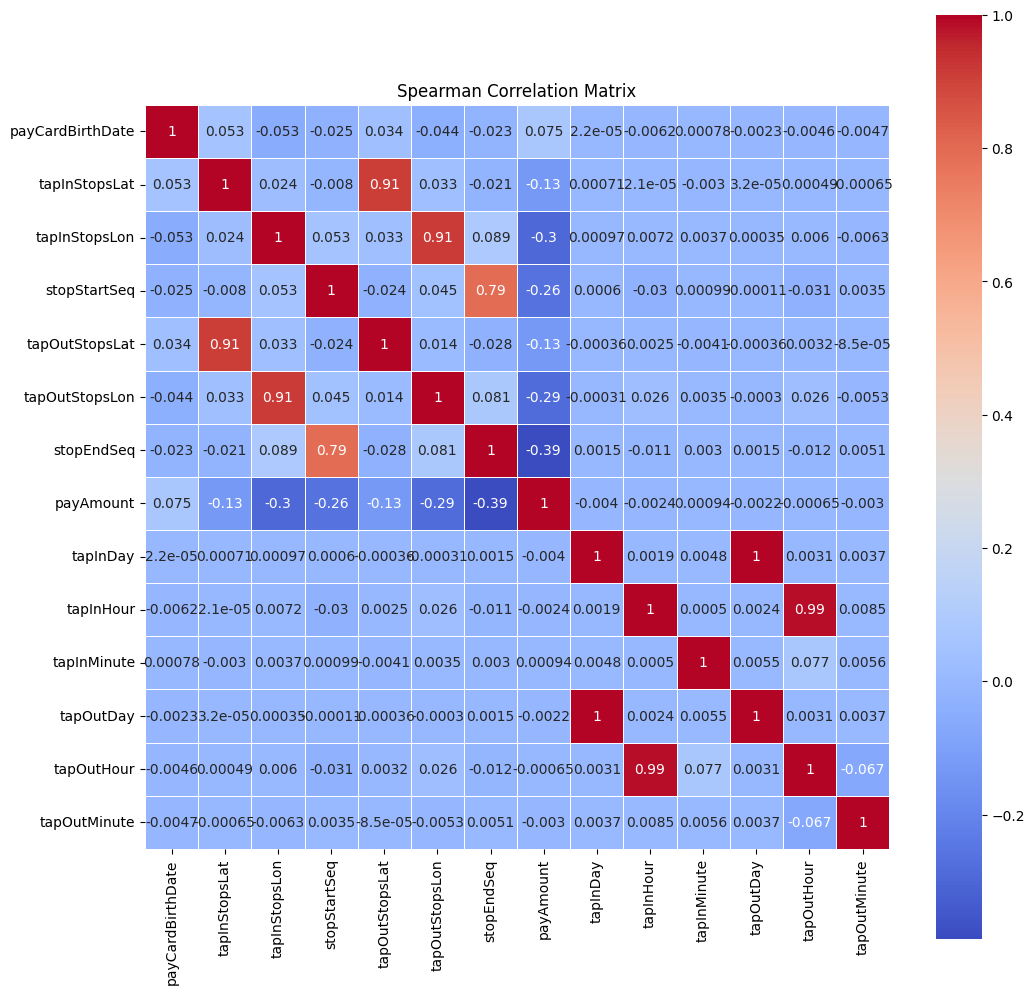

In [ ]:
plt.figure(figsize=(12, 12))  # Set ukuran frame
sns.heatmap(tj_num_cont.corr(method='spearman'), annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Spearman Correlation Matrix')
plt.show()

1. **Korelasi Tinggi antara Lokasi Tap In dan Tap Out**

  data lintang dan bujur TapIn dan TapOut menunjukkan korelasi yang sangat tinggi (**0.91**). Ini menunjukkan bahwa penumpang cenderung tap in dan tap out di lokasi yang hampir sama atau berdekatan
2. **Korelasi Positif antara Sequence Start dan End**

  stopStartSeq dan stopEndSeq memiliki korelasi sebesar **0.79**. Artinya, semakin tinggi urutan pemberhentian awal, semakin tinggi urutan pemberhentian akhir, yang mungkin terjadi karena pengguna melakukan perjalanan panjang di dalam satu rute.

3. **Korelasi Negatif dengan Jumlah Pembayaran (payAmount)**
  
  payAmount menunjukkan korelasi negatif dengan beberapa variabel, terutama dengan stopEndSeq (**-0.39**) dan tapInStopsLon (**-0.3**).
  
  Insight: Korelasi negatif ini bisa mengindikasikan bahwa jumlah pembayaran mungkin lebih rendah untuk perjalanan yang melibatkan stopseq yang lebih tinggi
4. **Korelasi yang Kuat antara tapInHour dan tapOutHour**

  Korelasi yang sangat kuat (**0.99**) antara jam tap-in dan tap-out menunjukkan bahwa waktu perjalanan dari tap-in ke tap-out relatif konsisten
5. **Korelasi kuat antara tapInDay dan tapOutDay**

  dengan nilai korelasi = **1** artinya antar data, nilai tapinDay dan tapOutDay bernilai sama


## Variabel Kategorik

Pada bagian ini, kita harus memastikan bahwa varabel yang ditinjau adalah **variabel kategorik**

In [ ]:
tj_cat = transjakarta.select_dtypes(include= 'object')
tj_cat

,transID,payCardID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,5,Matraman Baru - Ancol,P00142,Pal Putih,P00253,Tegalan
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,6C,Stasiun Tebet - Karet via Patra Kuningan,B01963P,Kemenkes 2,B03307P,Sampoerna Strategic
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,R1A,Pantai Maju - Kota,B00499P,Gg. Kunir II,B04962P,Simpang Kunir Kemukus
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,11D,Pulo Gebang - Pulo Gadung 2 via PIK,B05587P,Taman Elok 1,B03090P,Raya Penggilingan
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,12,Tanjung Priok - Pluit,P00239,Sunter Boulevard Barat,P00098,Kali Besar Barat
...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,6B,Ragunan - MH Thamrin via Semanggi,P00261,Tosari,P00228,SMK 57
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,9N,Pinang Ranti - Pramuka,P00064,Garuda Taman Mini,P00179,Pinang Ranti
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1T,Cibubur - Balai Kota,B02873P,Plaza Sentral,B00226P,Buperta Cibubur
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,JAK.13,Tanah Abang - Jembatan Lima,B02505P,Museum Textile,B01787P,JPO Blok G


### Statistika Deskriptif

In [ ]:
tj_cat.describe()

,transID,payCardID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName
count,37900,37900,37900,37900,37900,36643,35970,36687,37900,35611,36556
unique,37900,2000,6,1993,2,221,216,2570,2602,2230,2248
top,EIIW227B8L34VB,180062659848800,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,P00016,BKN
freq,1,40,18743,80,20157,400,391,236,243,306,316


berdasarkan hasil diatas, didapatkan informasi bahwa:
- ```transID``` bersifat unik, berjumlah **37900**, yang memiliki nilai berbeda setiap transaksinya, sedangkan **nilai unik** ```payCardID``` hanya berjumlah **2000**, yang menunjukan beberapa kartu digunakan berulang kali.
- terdapat perbedaan data unik untuk ```transID``` dan ```payCardName``` yang berarti banyak nama yang berulang dalam pencatatan transaksi.  
-  data ```payCardName``` Fathonah Saefullah	muncul sebanyak 80 kali. Hal ini terjadi atas beberapa kemungkinan yaitu nama tersebut tergolong umum, atau merupakan refleksi dari transaksi yang berulang.
- terdapat 6 Kartu bank yang digunakan untuk metode pembayaran dengan **pengguna terbanyak** adalah pengguna **kartu Bank DKI**
- terdapat 2 gender laki-laki dan perempuan (bersifat biner)
- didapati bahwa pengguna kartu berjenis kelamin **perempuan mendominasi** penggunaan layanan transjakarta, dengan jumlah pencatatan **20157 transaksi**.
- **Corridor** yang **paling banyak** digunakan adalah **1T (Cibubur - Balaikota)**
- Untuk halte yang banyak digunakan berdasarkan **TapIn** adalah **Penjaringan**
- Untuk halte yang banyak digunakan berdasarkan **TapOut** adalah **BKN**


------------------------

Untuk pemahaman lebih lanjut mengenai masing-masing variabel data yang ada, kita dapat membreakdown menjadi 2 sub yaitu data **numerik** dan **kategorik**.

### Unique Val

In [ ]:
tj_cat.nunique().sort_values(ascending = False)

,0
transID,37900
tapInStopsName,2602
tapInStops,2570
tapOutStopsName,2248
tapOutStops,2230
payCardID,2000
payCardName,1993
corridorID,221
corridorName,216
payCardBank,6


dari tabel diatas, dapat dilihat bahwa terdapat perbedaan jmlah nilai untuk variabel yang saling berhubungan atau mencerminkan data yang sama (misal ```tapInStops``` dan ```tapinStopsName```). hal ini menunjukan bahwa ada kemungkinan masalah dalam konsistensi data. Data-data hilang yang berhubungan dapat dilakukan pengisian dengan menggunakan domainknowledge, atau modus dari data

<Axes: >

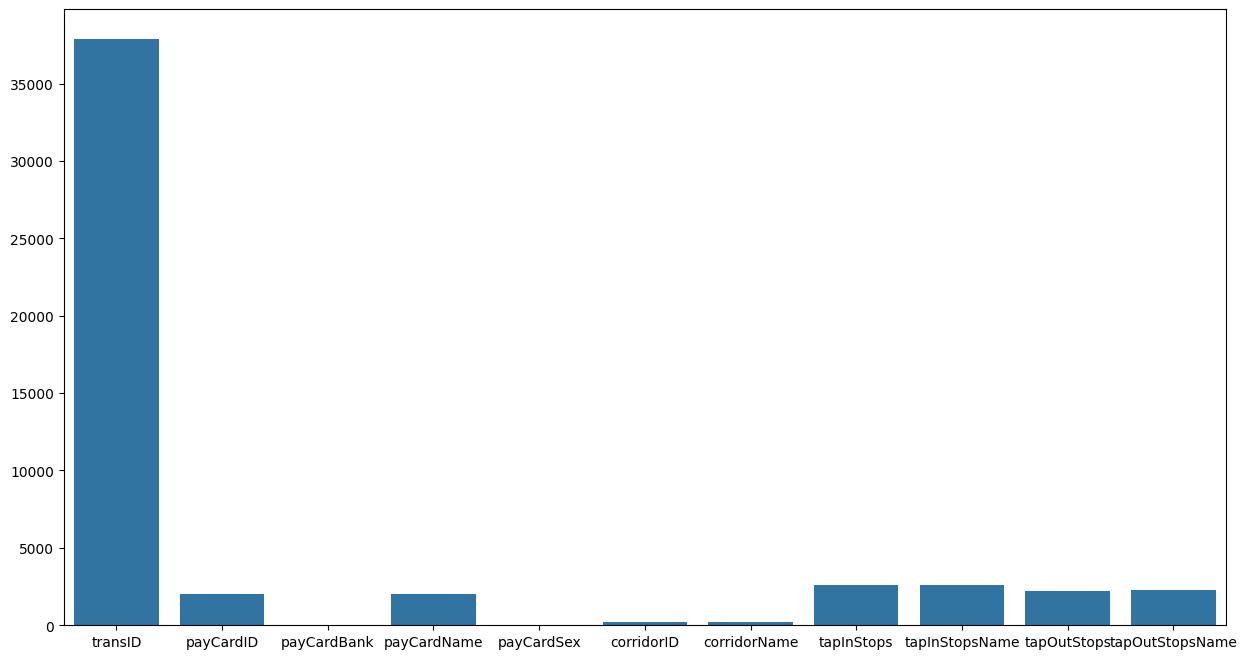

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(tj_cat.nunique())

### Value Counts

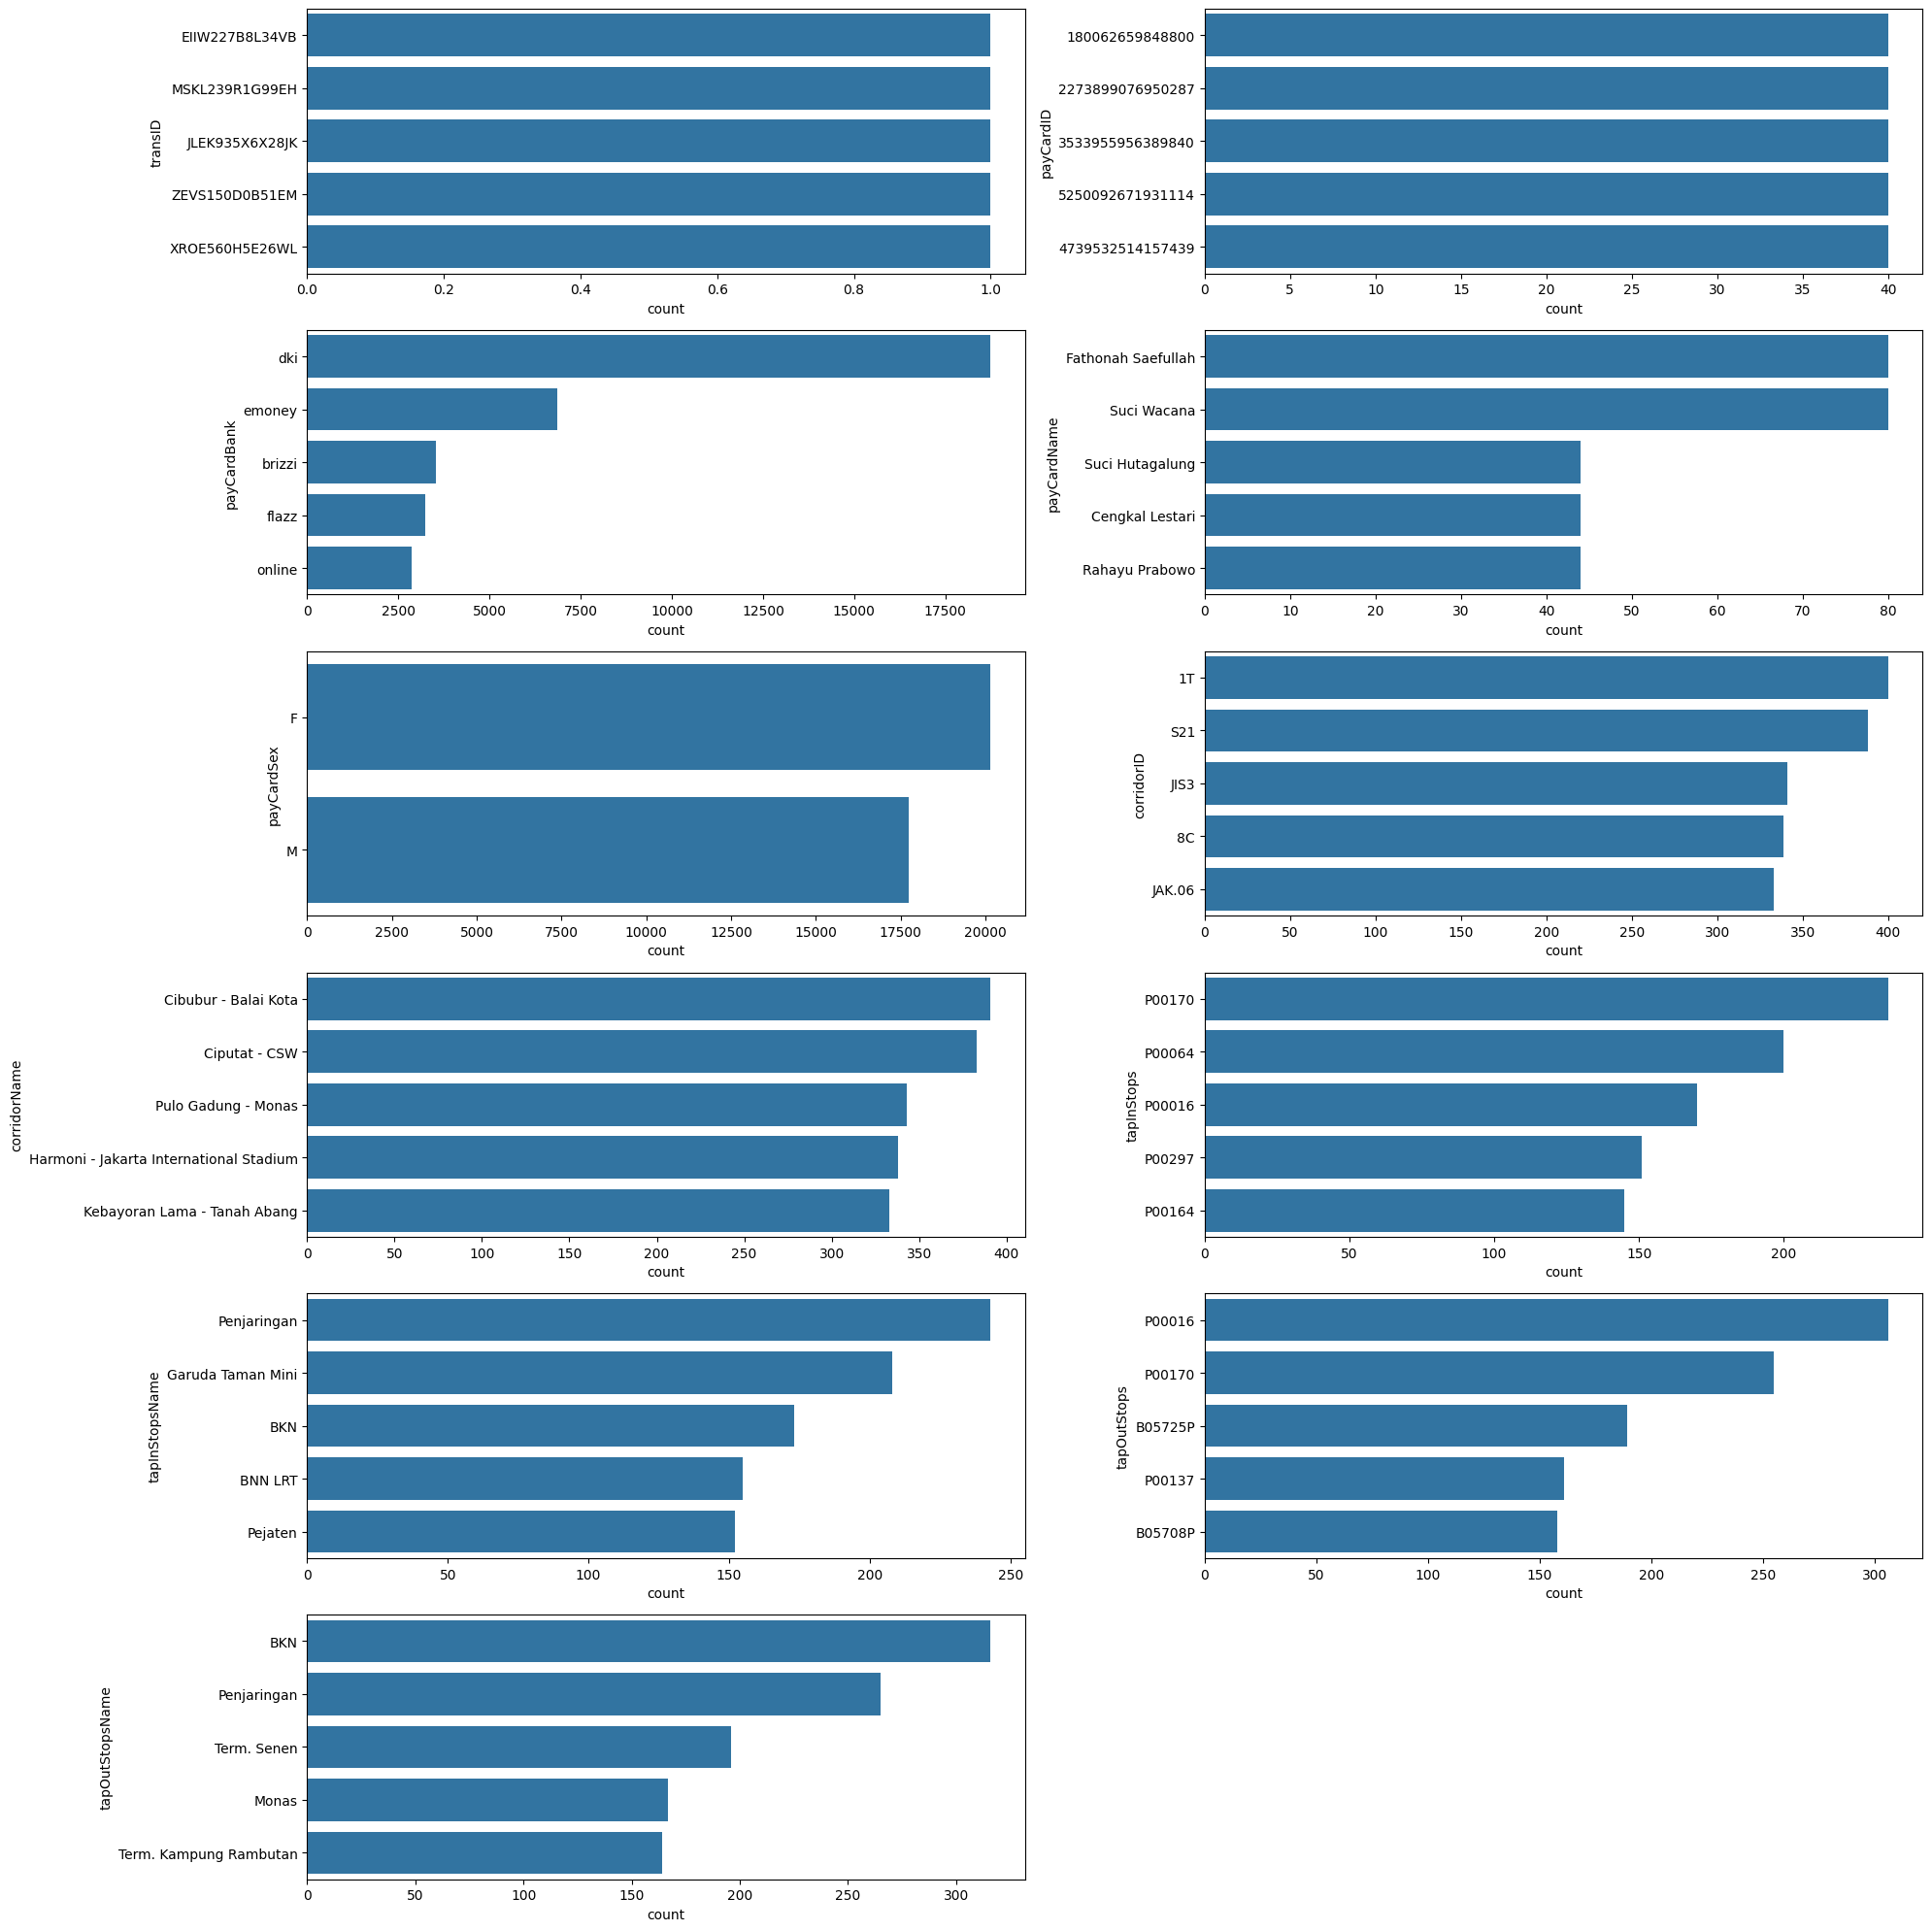

In [ ]:
# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (20,20)) # (horizontal, vertikal)

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in tj_cat.columns: # kategorik.columns = nama-nama kolom dalam list
    plt.subplot(6,2,posisi)
    sns.barplot(transjakarta[setiap_kolom].value_counts().head(5), orient = 'h')
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

dari grafik diatas dapat disimpulkan beberapa hal yaitu:
1. **Setiap tranID dan payCardID bersifat unik**. Tidak ada duplikasi yang teridentifikasi untuk variabel transID. Namun, terdapat payCardID digunakan berulang kali, yang menunjukkan bahwa sejumlah pengguna sering menggunakan layanan Transjakarta dengan kartu yang sama.
2. **Mayoritas pengguna** jasa menggunakan **layanan kartu** dari **Bank DKI** Perbedaan data penggunaan dengan paycard bank DKI dengan bank lain cukup signifikan. Hal ini **mengindikasi bahwa bank DKI mungkin memiliki hubungan** atau **kemitraan** yang lebih kuat dengan **Transjakarta**.
3. **Koridor 1T** dan rute "**Cibubur - Balai Kota"** merupakan yang **paling sering digunakan**.
4. Beberapa **halet** seperti "**Penjaringan", "BKN", dan "Term. Semen"** sering muncul. Ini bisa menjadi indikator halte utama yang banyak digunakan oleh penumpang sebagai titik awal atau tujuan akhir perjalanan.

# Pembersihan Data

pada tahap ini akan dilakukan handling teradap *missing value, duplicate,* maupun *outlier* yang ada pada dataset yang dimiliki. hal ini bertujuan untuk memastikan kualitas data yang digunakan dalam analisis sehingga data yang dianalisis akurat dan dapat diandalkan sehingga hasil analisis tidak bias atau menyesatkan.

dalam proses cleaning data, sebaiknya dilakukan **penyalinan dataset** untuk **mencegah terjadinya kehilangan data asli dan menghindari kesalahan yang tidak dapat dipulihkan.**

In [ ]:
tj_btc = df_Tj.copy()

## Handling Duplicate

Tahap ini dilakukan untuk memastikan, bahwa data yang akan dianalisis dan diproses nantinya tidak memiliki duplikat untuk meminimalisir kesalahan dalam analisis

### CorridorID vs Corridor Name

In [ ]:
data_dupe(tj_btc,'corridorID','corridorName')

,corridorName,lists,total_counts,value_counts_per_corridorID
12,Blok M - Kota,"1, M1",291,"230, 61"
55,Kalideres - Bundaran HI via Veteran,"3, M3",331,"127, 204"
88,Matraman Baru - Ancol,"5, M5",261,"246, 15"
108,Pinang Ranti - Pluit,"9, M9",208,"59, 149"
116,Pulo Gadung - Monas,"2, M2",339,"279, 60"


berdasarkan pengenalan terhadap data, diketahui bahwa corridorID dengan kode M pada list diatas adalah layanan AMARI tranjakarta yang beroperasi pada nama koridor yang sama namun jam operasional yang berbeda. untuk itu, akan dilakukan set ulang nama nama koridor untuk ke 5 koridor AMARI diatas dengan peenambahan kode "M" pada `corridorName`.

In [ ]:
# untuk memenggal data M1 itu artinya perjalanan malam
cornameDT = data_dupe(tj_btc,'corridorID','corridorName')

# Loop through each row in the table where there are multiple corridorIDs
for index, row in cornameDT.iterrows():
    corridor_name = row['corridorName']
    corridor_ids = row['lists'].split(', ')

    # Loop through each corridorID and update the corridorName
    for corridor_id in corridor_ids:
        if 'M' in corridor_id:  # Check if the corridorID contains 'M'
            tj_btc.loc[(tj_btc['corridorName'] == corridor_name) & (tj_btc['corridorID'] == corridor_id), 'corridorName'] = f'{corridor_name}(M)'

In [ ]:
data_dupe(tj_btc,'corridorID','corridorName')

,corridorName,lists,total_counts,value_counts_per_corridorID


setelah dilakukan perubahan nama koridor tersebut, terlihat bahwa sudah  tidak ada data duplikat lagi untuk tiap `corridorName`.

### tapStops vs tapStopsName

#### tapOutStops vs tapOutStopsName

In [ ]:
combined_countsOut

,tapOutStopsName,tapOutStops,tapOutStopsLat,tapOutStopsLon,count
0,Dukuh Atas 2,P00052,-6.203276,106.823770,28
1,Dukuh Atas 2,P00298,-6.204494,106.823327,20


Berdasarkan googleMaps, [Halte Dukuh Atas 2](https://www.google.com/maps/place/Dukuh+Atas+2+(Archived)/@-6.2083934,106.8271188,2173m/data=!3m1!1e3!4m16!1m9!3m8!1s0x2e69f41b8aa53985:0x4223b1e7fb896c0c!2sDukuh+Atas+2+(Archived)!8m2!3d-6.2033!4d106.82378!9m1!1b1!16s%2Fg%2F11j48dzmhx!3m5!1s0x2e69f41b8aa53985:0x4223b1e7fb896c0c!8m2!3d-6.2033!4d106.82378!16s%2Fg%2F11j48dzmhx?entry=ttu&g_ep=EgoyMDI0MDgyMS4wIKXMDSoASAFQAw%3D%3D) (koordinat: -6.20278, 106.82390
 ) memiliki koordinat yang sangat berdekatan (dilokasi yang cenderung sama) dengan tapOutStops P00052 dengan (koordinat: -6.203276,106.823770). Perbedaan ini dapat terjadi karena adanya perbedaan pendekatan peletakan titik acuan halte dari PT. Transjakarta dan Google. Atas dasar ini, akan dilakukan drop data lain yang memiliki data `tapOutStopsName` = Dukuh Atas 2.

In [ ]:
tj_btc.drop(
    tj_btc[
        (tj_btc['tapOutStopsName'] == 'Dukuh Atas 2') &
        (
            (tj_btc['tapOutStops'] != 'P00052') |
            (tj_btc['tapOutStopsLat'] != -6.203276) |
            (tj_btc['tapOutStopsLon'] != 106.823770)
        )
    ].index,
    inplace=True
)

In [ ]:
data_dupe(tj_btc,'tapOutStops','tapOutStopsName')

,tapOutStopsName,lists,total_counts,value_counts_per_corridorID


setelah proses dropping dilakukan, dapat dilihat bahwa tidak ada lagi data duplikat untuk halte Dukuh Atas 2, dan tidak ada data duplikat lain terkait data kode halte dan nama halte didalam dataset.

#### tapinstops tapinstopsName

In [ ]:
counts_P00052 = calculate_counts(tj_btc, 'P00052', 'Dukuh Atas 2','tapInStops','tapInStopsName','tapInStopsLat', 'tapInStopsLon')
counts_P00298 = calculate_counts(tj_btc, 'P00298', 'Dukuh Atas 2','tapInStops','tapInStopsName','tapInStopsLat', 'tapInStopsLon')

combined_countsIn = pd.concat([counts_P00052, counts_P00298], ignore_index=True)

combined_countsIn = combined_countsIn.groupby(['tapInStopsName','tapInStops','tapInStopsLat', 'tapInStopsLon'])['count'].sum().reset_index()
combined_countsIn

,tapInStopsName,tapInStops,tapInStopsLat,tapInStopsLon,count
0,Dukuh Atas 2,P00052,-6.203276,106.823770,20
1,Dukuh Atas 2,P00298,-6.204494,106.823327,1


memiliki case yang sama seperti tapOutStops vs tapOutStopsName, maka langkah yang sama akan dilakukan untuk handle data duplikat ini, yaitu drop data selain data yang sesuai dengan referensi koordinat lokasi halte Dukuh Atas 2 yang ada.

In [ ]:
tj_btc.drop(
    tj_btc[
        (tj_btc['tapInStopsName'] == 'Dukuh Atas 2') &
        (
            (tj_btc['tapInStops'] != 'P00052') |
            (tj_btc['tapInStopsLat'] != -6.203276) |
            (tj_btc['tapInStopsLon'] != 106.823770)
        )
    ].index,
    inplace=True
)

In [ ]:
data_dupe(tj_btc,'tapInStops','tapInStopsName')

,tapInStopsName,lists,total_counts,value_counts_per_corridorID


setelah dilakukan dropping, maka dataset sudah bersih dari data duplikat tapInstops dan tapInStopsName yang ada.

## Handling Missing Value

berikut adalah daftar variabel yang memiliki data hilang dan persentase hilang terhadap total data. Untuk itu, kita perlu mengisi missing value terlebih dahulu sesuai dengan parameter yang ada.

In [ ]:
nan_tab(tj_btc).sort_values(by='jumlah', ascending=False)

,jumlah,persentase %
tapOutStops,2286,6.04
corridorName,1930,5.10
tapOutStopsName,1344,3.55
tapOutStopsLat,1344,3.55
tapOutStopsLon,1344,3.55
stopEndSeq,1344,3.55
tapOutTime,1344,3.55
corridorID,1257,3.32
tapInStops,1212,3.20
payAmount,1007,2.66


### ```corridorID```

In [ ]:
# jumlah missing value di kolom 'corridorID' dan 'corridorName'
tj_btc[['corridorID', 'corridorName']].isna().sum()

,0
corridorID,1257
corridorName,1930


Seperti yang diketahui sebelumnya, terdapat 1.257 missing  pada field ```corridorID``` dan 1930 pada field ```corridorName```.

Akan dilakukan percobaan pengisian missing value dengan menggunakan Mapping berdasarkan data yang sudah tersedia. Teknik ini memungkinkan untuk mentransformasi data dengan mengganti nilai missing value pada field yang ada dengan nilai lain yang sesuai dengan pemetaan yang telah ditentukan sebelumnya.

#### Mapping dengan ```CorridorName```

In [ ]:
data_dupe(tj_btc,'corridorID','corridorName')

,corridorName,lists,total_counts,value_counts_per_corridorID


karena sudah dilakukan cleaning dupe sebelumnya antar corridorID dan corridorName, maka tidak terdapat anomali/duplikat dalam proses pemetaan data ini.

In [ ]:
# Memastikan kolom yang kosong diwakili oleh nan
tj_btc['corridorID'].fillna(np.nan, inplace=True)

# Membuat pemetaan antara corridorName dan corridorID yang tidak kosong
mapping = tj_btc[tj_btc['corridorID'].notnull()].groupby('corridorName')['corridorID'].unique().apply(lambda x: x[0])

# Mengisi nilai yang hilang di corridorID berdasarkan corridorName yang sesuai
tj_btc['corridorID'].fillna(tj_btc['corridorName'].map(mapping), inplace=True)

# jumlah missing value di kolom 'corridorID' dan 'corridorName'
tj_btc[['corridorID']].isna().sum()

,0
corridorID,1125


dapat dilihat bahwa tidak semua data pada ```corridorID``` terisi oleh  ```corridorName```. dari missing 1930 data, terhitung hanya sebanyak 132 data terisi, dengan sisa missing value untuk `corridorID` adalah 1125. hal ini dapat terjadi karena adanya kemungkinan terdapatnya missing value pada data acuan (```corridorName```) pada baris yang bersesuaian.

### `corridorName`

#### mapping dengan `corridorID`

In [ ]:
tj_btc[['corridorName']].isna().sum()

,0
corridorName,1930


In [ ]:
# Memastikan kolom yang kosong diwakili oleh nan
tj_btc['corridorName'].fillna(np.nan, inplace=True)

# Membuat pemetaan antara corridorName dan corridorID yang tidak kosong
mapping = tj_btc[tj_btc['corridorName'].notnull()].groupby('corridorID')['corridorName'].unique().apply(lambda x: x[0])

# Mengisi nilai yang hilang di corridorID berdasarkan corridorName yang sesuai
tj_btc['corridorName'].fillna(tj_btc['corridorID'].map(mapping), inplace=True)

tj_btc[['corridorName']].isna().sum()

,0
corridorName,1125


setelah dilakukan mapping silang dengan corridorID, missing value untuk `corridorName` menjadi 1125.

### `tapOutStops` dan `tapInStops`



In [ ]:
nan_tab(tj_btc).sort_values(by='jumlah', ascending = False)

,jumlah,persentase %
tapOutStops,2286,6.04
tapOutStopsName,1344,3.55
tapOutStopsLat,1344,3.55
tapOutStopsLon,1344,3.55
stopEndSeq,1344,3.55
tapOutTime,1344,3.55
tapInStops,1212,3.20
corridorID,1125,2.97
corridorName,1125,2.97
payAmount,1007,2.66


#### **tapOutStops**

##### **Mapping dengan `tapOutStopsName`**

In [ ]:
# Memastikan kolom yang kosong diwakili oleh nan
tj_btc['tapOutStops'].fillna(np.nan, inplace=True)

# Membuat pemetaan antara corridorName dan corridorID yang tidak kosong
mapping = tj_btc[tj_btc['tapOutStops'].notnull()].groupby('tapOutStopsName')['tapOutStops'].unique().apply(lambda x: x[0])

# Mengisi nilai yang hilang di corridorID berdasarkan corridorName yang sesuai
tj_btc['tapOutStops'].fillna(tj_btc['tapOutStopsName'].map(mapping), inplace=True)

tj_btc[['tapOutStops']].isna().sum()

,0
tapOutStops,1363


setelah dilakukan mapping dengan `tapOutStopsName`, dari 2286 missing value, terisi 923 data dan tersisa 1363 missing value untuk `tapOutStops`

terisi 926 data, sisa 1363

##### **Mapping dengan `tapOutStops` koordinat**

In [ ]:
def create_map(df, columns,fit):
    # Membuat peta dengan koordinat sebagai kunci dan corridorID sebagai nilai
    return df.dropna(subset=[fit]).drop_duplicates(columns).set_index(columns)[fit]

def fill_missing_values(val,df, map_df, columns,fit):
    # Hanya mengisi nilai di kolom corridorID yang NaN
    df[val] = df.apply(lambda row: map_df.get(tuple(row[columns]), row[fit]) if pd.isna(row[fit]) else row[fit],
        axis=1)

In [ ]:
map_tapOutStops_latlon = create_map(tj_btc, (['tapOutStopsLat', 'tapOutStopsLon']),'tapOutStops')
fill_missing_values('tapOutStops',tj_btc, map_tapOutStops_latlon, (['tapOutStopsLat', 'tapOutStopsLon']),'tapOutStops')
tj_btc[['tapOutStops']].isna().sum()

,0
tapOutStops,1363


terlihat tidak adanya data yang terisi menggunakan data koordinat tapOut. Tersisa 1363 missing value

#### **tapInStops**

##### **Mapping dengan `tapInStopsName`**

In [ ]:
tj_btc[['tapInStops']].isna().sum()

,0
tapInStops,1212


In [ ]:
tj_btc['tapInStops'].fillna(np.nan, inplace=True)
mapping = tj_btc[tj_btc['tapInStops'].notnull()].groupby('tapInStopsName')['tapInStops'].unique().apply(lambda x: x[0])
tj_btc['tapInStops'].fillna(tj_btc['tapInStopsName'].map(mapping), inplace=True)
tj_btc[['tapInStops']].isna().sum()

,0
tapInStops,34


dari data diatas, diketahui awalnya data hilang sebanyak 1212, dan saat dilakukan mapping data menggunakan tapInStopsName, tersisa sebanyak 34 missing value

##### **Mapping dengan `tapInStops` koordinat**

In [ ]:
map_tapOutStops_latlon = create_map(tj_btc, (['tapInStopsLat', 'tapInStopsLon']),'tapInStops')
fill_missing_values('tapInStops',tj_btc, map_tapOutStops_latlon, (['tapInStopsLat', 'tapInStopsLon']),'tapInStops')
tj_btc[['tapInStops']].isna().sum()

,0
tapInStops,34


tidak adanya pengaruh mapping koordinat tapIn terhadap missing data `tapInStops`

### `tapOutStopsName`

ngisi name dari tapoutstops

In [ ]:
tj_btc[['tapOutStopsName']].isna().sum()

,0
tapOutStopsName,1344


In [ ]:
def impute_tapOutStopsName(row):
    if pd.isna(row['tapOutStopsName']):
        return mapping.get(row['tapOutStops'], row['tapOutStopsName'])
    else:
        return row['tapOutStopsName']

mapping = tj_btc.dropna(subset=['tapOutStopsName']).drop_duplicates(subset=['tapOutStops']).set_index('tapOutStops')['tapOutStopsName']
tj_btc['tapOutStopsName'] = tj_btc.apply(impute_tapOutStopsName, axis=1)
tj_btc[['tapOutStopsName']].isna().sum()

,0
tapOutStopsName,0


berdasarkan mapping data tapOutStopsName pada tapOutStops, seluruh missing value dapat terisi

In [ ]:
def fill_missing_tapOutStopsName(row):
    if pd.isnull(row['tapOutStopsName']) and pd.notnull(row['tapOutStops']):
        return tap_out_stops_name_mapping.get(row['tapOutStops'])
    return row['tapOutStopsName']
tap_out_stops_name_mapping = tj_btc.dropna(subset=['tapOutStopsName']).drop_duplicates('tapOutStops')
tap_out_stops_name_mapping = tap_out_stops_name_mapping.set_index('tapOutStops')['tapOutStopsName']

In [ ]:
tj_btc['tapOutStopsName'] = tj_btc.apply(fill_missing_tapOutStopsName, axis=1)
tj_btc['tapOutStopsName'].isna().sum()

0

### `tapOutStopsLat` dan `tapOutStopsLon`

#### `tapOutStopsLat`

In [ ]:
def fill_missing_tapOutStopsLat(row):
    if pd.isnull(row['tapOutStopsLat']) and pd.notnull(row['tapOutStops']):
        return tap_out_stops_lat_mapping.get(row['tapOutStops'])
    return row['tapOutStopsLat']

tap_out_stops_lat_mapping = tj_btc.dropna(subset=['tapOutStopsLat']).drop_duplicates('tapOutStops')
tap_out_stops_lat_mapping = tap_out_stops_lat_mapping.set_index('tapOutStops')['tapOutStopsLat']

tj_btc['tapOutStopsLat'] = tj_btc.apply(fill_missing_tapOutStopsLat, axis=1)

In [ ]:
tj_btc.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [ ]:
tj_btc['tapOutStopsLat'].isna().sum()

1344

#### `tapOutStopsLon`

In [ ]:
def fill_missing_tapOutStopsLon(row):
    if pd.isnull(row['tapOutStopsLon']) and pd.notnull(row['tapOutStops']):
        return tap_out_stops_lat_mapping.get(row['tapOutStops'])
    return row['tapOutStopsLon']

tap_out_stops_lon_mapping = tj_btc.dropna(subset=['tapOutStopsLon']).drop_duplicates('tapOutStops')
tap_out_stops_lon_mapping = tap_out_stops_lon_mapping.set_index('tapOutStops')['tapOutStopsLon']

tj_btc['tapOutStopsLon'] = tj_btc.apply(fill_missing_tapOutStopsLon, axis=1)

In [ ]:
tj_btc['tapOutStopsLon'].isna().sum()

1344

berdasarkan hasil mapping, data  `tapOutStops` tidak dapat mengisi nilai hilang pada koordinat `tapOut`. tersisa 1344 missing value pada data koordinat `tapOut`

### `payAmount`

In [ ]:
pA_dupe = data_dupe(tj_btc, 'payAmount', 'corridorID',)
pA_dupe

,corridorID,lists,total_counts,value_counts_per_corridorID


In [ ]:
tj_btc[['payAmount']].isna().sum()

,0
payAmount,1007


In [ ]:
cID_pA_nan =tj_btc[tj_btc['payAmount'].isna()]['corridorID'].value_counts()
cID_pA_nan

,count
corridorID,
M7B,310
JAK.48A,249
M1H,171
JAK.48B,159
3H,90


berdasarkan 3 data diatas, terdapat 5 corridorID yang memiliki missing value payAmount, dengan total missing value berjumlah  1007 data.<br> kita akan melihat, apakah terdapat kolom `corridorID` yang dapat dijadikan referensi untuk mapping data `payAmount` yang hilang menggunakan kode dibawah ini.

In [ ]:
corridors_with_missing_values = ['M7B', 'JAK.48A', 'M1H', 'JAK.48B', '3H']
filtered_data = tj_btc[tj_btc['corridorID'].isin(corridors_with_missing_values)]
pay_amounts_per_corridor = filtered_data.groupby('corridorID')['payAmount'].unique().reset_index()
pay_amounts_per_corridor

,corridorID,payAmount
0,3H,[nan]
1,JAK.48A,[nan]
2,JAK.48B,[nan]
3,M1H,[nan]
4,M7B,[nan]


dapat dilihat bahwa, tidak ada data corridorID yang dapat dijadikan parameter mapping payAmount untuk masing-masing data yang hilang. untuk itu, akan dilakukan input manuam menggunakan domain knowledge yang ada.<br>

PayAmount / tarif dibedakan berdasarkan layanan yang digunakan. Setiap layanan memiliki beberapa kode berbeda yang dapat diidentifikasi menggunakan mengenai dan layanan yang disesiakan oleh PT. Transjakarta. <br>

Dalam pengisian Missing Value payAmount, terdapat beberapa domain knowladge yang dapat menjadi insight:
 - Layanan BRT transjakarta, Non BRT, maupun Transjabodetabek memiliki tarif flat yaitu, Rp.3500. [fererensi tarif transjabodetabek](https://megapolitan.kompas.com/read/2023/02/11/00150041/rute-transjabodetabek-b21-bekasi-timur-cawang-uki)
 - Royaltrans dikenakan tarif sebesar Rp.20.000.
 - Layanan Transjabodetabek dikenakan tarif sebesar 3500
 - Tarif layanan Mikrotrans (Jaklingko)  dan layanan wisata adalah Rp.0
 - missing value pada kolom ini diabgi berdasarkan 3, yaitu jika korido melayani Royaltrans, jaklingko, dan layanan BRT/Non-BRT/Transjabodetabek


berdasarkan missing value diatas, <br>

| Daftar koridor    | layanan           | payAmount |
|-------------------|-------------------|-----------|
| M7B, M1H          | Layanan Non BRT   | 3500      |
| JAK.48A, JAK.48B  | Jaklingko         | 0         |
| 3H                | Layanan BRT       | 3500      |

[REFERENSI KORRIDOR ROYALTRANS DAN TARIF](https://transjakarta.co.id/rute)

In [ ]:
# Data koridor yang memiliki missing value pada payAmount
corridors_with_missing_values = ['M7B', 'JAK.48A', 'M1H', 'JAK.48B', '3H']

# Fungsi untuk mengisi nilai payAmount berdasarkan corridorID
def filling_dupe_PA(row):
    corridorID = row['corridorID']
    if pd.isna(row['payAmount']):  # Check if payAmount is NaN
        if corridorID in ['M7B', 'M1H']:
            return 3500
        elif corridorID in ['JAK.48A', 'JAK.48B']:
            return 0
        elif corridorID == '3H':
            return 3500
        else:
            return np.nan  # Default untuk koridor lain jika diperlukan
    else:
        return row['payAmount']

# Mengisi nilai payAmount yang kosong
tj_btc['payAmount'] = tj_btc.apply(filling_dupe_PA, axis=1)

# Menampilkan hasil
tj_btc[['corridorID', 'payAmount']]

,corridorID,payAmount
0,5,3500.0
1,6C,3500.0
2,R1A,3500.0
3,11D,3500.0
4,12,3500.0
...,...,...
37895,6B,3500.0
37896,9N,3500.0
37897,1T,20000.0
37898,JAK.13,0.0


In [ ]:
tj_btc['payAmount'].isna().sum()

28

dapat dilihat bahwa tersisa 28 missing value untuk payAmount yang tersisa.

## Handling Outliers

tahap ini dilakukan untuk melihat apakah langkah yang sebaiknya dilakukan terhadap data-data outlier yang ada

In [ ]:
tj_btc_num = tj_btc.select_dtypes(include= 'number')

def calculate_outliers_iqr(data):
    q3 = data.quantile(0.75)
    q1 = data.quantile(0.25)
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = q3 + whis
    lower_bound = q1 - whis
    outliers = len(data[(data > upper_bound) | (data < lower_bound)])
    percent_outliers = round((outliers / len(data)) * 100, 2)
    return outliers, percent_outliers, upper_bound,lower_bound

def calculate_outliers_zscore(data):
    std = data.std()
    mean = data.mean()
    zscore = abs((data - mean) / std)
    outliers = len(zscore[zscore > 2])
    percent_outliers = round((outliers / len(data)) * 100, 2)
    return outliers, percent_outliers, zscore

list_outliers_iqr = []
list_persentase_outliersiqr = []
list_outliers_zs = []
list_persentase_outlierszs = []
jlh_data = []

for setiap_kolom in tj_btc_num.columns:
    data = tj_btc_num[setiap_kolom]
    outliers_iqr, percent_outliers_iqr, upper_bound,lower_bound = calculate_outliers_iqr(data)
    outliers_zscore, percent_outliers_zscore, zscore = calculate_outliers_zscore(data)
    list_outliers_iqr.append(outliers_iqr)
    list_persentase_outliersiqr.append(percent_outliers_iqr)
    jlh_data.append(len(data))
    list_outliers_zs.append(outliers_zscore)
    list_persentase_outlierszs.append(percent_outliers_zscore)

outliers = pd.DataFrame({
    'kolom': tj_btc_num.columns,
    'panjang data': jlh_data,
    'jlh outliers IQR': list_outliers_iqr,
    '%outliers IQR': list_persentase_outliersiqr,
    'jlh outliers Zscore' : list_outliers_zs,
    '%outliers ZScore': list_persentase_outlierszs
    })
outliers

,kolom,panjang data,jlh outliers IQR,%outliers IQR,jlh outliers Zscore,%outliers ZScore
0,payCardBirthDate,37876,344,0.91,782,2.06
1,direction,37876,0,0.00,0,0.00
2,tapInStopsLat,37876,411,1.09,1390,3.67
3,tapInStopsLon,37876,558,1.47,1329,3.51
4,stopStartSeq,37876,1543,4.07,2055,5.43
5,tapOutStopsLat,37876,359,0.95,1241,3.28
6,tapOutStopsLon,37876,449,1.19,1419,3.75
7,stopEndSeq,37876,583,1.54,1800,4.75
8,payAmount,37876,1742,4.60,1742,4.60


berdasarkan outliers yang ada, data akan tetap dipertahankan karena dianggap masuk akal dan memang dapat merepresentasikan kondisi pengguna jasa transjakarta yang dianggap dapat memberikan insight dan poin pertimbangan dalam analisis jika data tetap dipertahankan

## Drop data yang tidak diperlukan

In [ ]:
nan_tab(tj_btc).sort_values(by='jumlah', ascending=False)

,jumlah,persentase %
tapOutStops,1363,3.60
tapOutStopsLat,1344,3.55
tapOutStopsLon,1344,3.55
stopEndSeq,1344,3.55
tapOutTime,1344,3.55
corridorID,1125,2.97
corridorName,1125,2.97
tapInStops,34,0.09
payAmount,28,0.07


In [ ]:
tj_btc = tj_btc.dropna(subset=['corridorID'])
tj_btc = tj_btc.dropna(subset=['corridorName'])
tj_btc = tj_btc.dropna(subset=['tapInStops'])
tj_btc = tj_btc.dropna(subset=['tapOutTime'])
tj_btc = tj_btc.dropna(subset=['payAmount'])
tj_btc = tj_btc.dropna(subset=['tapOutStops'])
tj_btc = tj_btc.dropna(subset=['tapOutStopsLat'])
tj_btc = tj_btc.dropna(subset=['tapOutStopsLon'])
tj_btc = tj_btc.dropna(subset=['stopEndSeq'])

In [ ]:
nan_tab(tj_btc).sort_values(by='jumlah', ascending=False)

,jumlah,persentase %


data sudah dibersihkan dari nilai-nilai yang tidak diinginkan.

## Modifikasi tabel

### Tabel waktu

akan ditambahkan beberapa tabel dari variabel waktu yang kita miliki, agar dapat memberikan informasi lebih dalam proses analisis terkait analisis waktu

In [ ]:
tj_btc['trans_day'] = tj_btc['tapInTime'].dt.strftime('%A')
tj_btc['tapInWeek'] = tj_btc['tapInTime'].dt.strftime('%d')

tj_btc['tapInDay'] = tj_btc['tapInTime'].dt.day
tj_btc['tapInHour'] = tj_btc['tapInTime'].dt.hour

tj_btc['tapOutDay'] = tj_btc['tapOutTime'].dt.day
tj_btc['tapOutHour'] = tj_btc['tapOutTime'].dt.hour

In [ ]:
tj_btc

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,trans_day,tapInWeek,tapInDay,tapInHour,tapInMinute,tapOutDay,tapOutHour,tapOutMinute
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Monday,03,3,5,21,3,6,0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Monday,03,3,5,42,3,6,40
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Monday,03,3,5,59,3,6,50
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Monday,03,3,5,44,3,6,28
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Monday,03,3,6,17,3,6,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,Friday,21,21,18,18,21,19,55
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,Tuesday,18,18,21,52,18,22,28
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,Tuesday,04,4,10,29,4,13,27
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,Saturday,15,15,19,59,15,20,27


### Kategori kendaraan

akan ditambahkan kolom berisi tipe angkutan yang digunakan untuk tiap data transaksi yang ada

In [ ]:
# cek nilai disini. ddate week day
# tap in day, tap out day, tap in week

corID_royaltrans = ['B14','6P','D31','D32','S12','S31','T21','1K','B13','1T','S24']
corID_exp = ['BW9','BW1','BW2','BW4']
corID_transjabodetabek = ['B21','S11','D11','T11','S21','B11','S22','T12','D21']

def cat_vehicle(row):
    corridorID = row['corridorID']

    if corridorID in corID_exp:
        return 'Angkutan Wisata'
    elif corridorID in corID_royaltrans:
        return 'RoyalTrans'
    elif corridorID in corID_transjabodetabek:
        return 'Transjabodetabek'
    elif 'JAK' in corridorID:
        return 'Jaklingko'
    else:
        return 'Transjakarta'

tj_btc['typeofTJ'] = tj_btc.apply(cat_vehicle, axis=1)
tj_btc.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,trans_day,tapInWeek,tapInDay,tapInHour,tapInMinute,tapOutDay,tapOutHour,tapOutMinute,typeofTJ
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Monday,03,3,5,21,3,6,0,Transjakarta
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Monday,03,3,5,42,3,6,40,Transjakarta
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Monday,03,3,5,59,3,6,50,Transjakarta
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Monday,03,3,5,44,3,6,28,Transjakarta
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Monday,03,3,6,17,3,6,57,Transjakarta


### Kolom usia

Akan dilakukan penambahan kolom berisi usia dari setiap pengguna yang terdata. Usia pengguna yang ditampilkan pada tabel adalah usia pengguna saat menggunakan kartu didalam data (per April 2023)
pengelompokan usia ini berdasar pada:
1. Anak-anak (0-12 tahun)
WHO (World Health Organization): WHO mengelompokkan "anak-anak" sebagai individu dari kelahiran hingga usia 12 tahun dalam banyak panduan terkait kesehatan dan perkembangan anak. [WHO Child Health](https://www.who.int/health-topics/child-health#tab=tab_2)
2. Remaja (12-19 tahun)
WHO: WHO mendefinisikan "remaja" sebagai individu berusia 10-19 tahun. Definisi ini banyak digunakan untuk penelitian dan kebijakan yang terkait dengan kesehatan remaja.[WHO Adolescent Health](https://www.who.int/health-topics/adolescent-health#tab=tab_1)
3. Dewasa (19-60 tahun)
Salah satu sumber yang sering dijadikan referensi adalah dari United Nations (UN) mengenai demografi penduduk:[UN Age Structure](https://population.un.org/wpp/)
4. Lansia (60 tahun ke atas)
UN (United Nations): PBB menggunakan batas usia 60 tahun ke atas untuk mengidentifikasi kelompok "lansia" dalam laporan demografi dan kesehatan global.
[UN Population Ageing](https://www.un.org/en/global-issues/ageing)

In [ ]:
tj_btc['age'] = 2023 - tj_btc['payCardBirthDate']
tj_btc.head()

def create_age_category(cols):
    if cols < 12:
        return 'Anak-anak (PG)'
    elif  12 <= cols <= 19:
        return 'Remaja'
    elif 19 < cols <= 60:
        return 'Dewasa'
    else:
        return 'Lansia'
tj_btc['ageCategory'] = tj_btc['age'].apply(create_age_category)
tj_btc.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,trans_day,tapInWeek,tapInDay,tapInHour,tapInMinute,tapOutDay,tapOutHour,tapOutMinute,typeofTJ,age,ageCategory
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Monday,03,3,5,21,3,6,0,Transjakarta,15,Remaja
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Monday,03,3,5,42,3,6,40,Transjakarta,26,Dewasa
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Monday,03,3,5,59,3,6,50,Transjakarta,31,Dewasa
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Monday,03,3,5,44,3,6,28,Transjakarta,45,Dewasa
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Monday,03,3,6,17,3,6,57,Transjakarta,41,Dewasa


## Download data bersih

In [ ]:
from google.colab import files

csv_file_path = 'Transjakarta_cleaned.csv'
tj_btc.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EDA

## Profil Pengguna Layanan

### Distribusi berdasarkan jenis kelamin

In [ ]:
gender_counts = tj_btc['payCardSex'].value_counts().reset_index()
gender_counts.columns = ['payCardSex', 'count']
gender_counts['percentage'] = round((gender_counts['count'] / gender_counts['count'].sum()) * 100, 2)

gender_counts

,payCardSex,count,percentage
0,F,18848,53.24
1,M,16556,46.76


dari total 35404 transaksi pada bulan April 2023, terdata ada 18.848 transaksi pengguna berjenis kelamin perempuan dan 16556	untuk pengguna laki-laki. dapat dilihat persentase berdasarkan jumlah transaksi dengan pengguna adalah wanita lebih dibanding pria.

In [ ]:
grouped_gen = tj_btc.groupby('payCardID')['payCardSex'].value_counts().reset_index(name='count')
grouped_gen = grouped_gen['payCardSex'].value_counts().reset_index()
grouped_gen.columns = ['payCardSex', 'count']
grouped_gen['percentage'] = round((grouped_gen['count'] / grouped_gen['count'].sum()) * 100, 2)
grouped_gen

,payCardSex,count,percentage
0,F,1052,53.24
1,M,924,46.76


berdasarkan payCardID, terdata ada 1976 kartu yang sudah teregistrasi di sistem PT. Transjakarta untuk transaksi pada bulan April 2023, dengan persentase payCardID yang terdata dengan jenis kelamin perempuan lebih banyak 6.48%.

<ipython-input-212-cc2dfc9a741f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payCardSex', y='count', data=grouped_gen, palette=['#F5F5DC', '#C2B280'], ax=ax1)


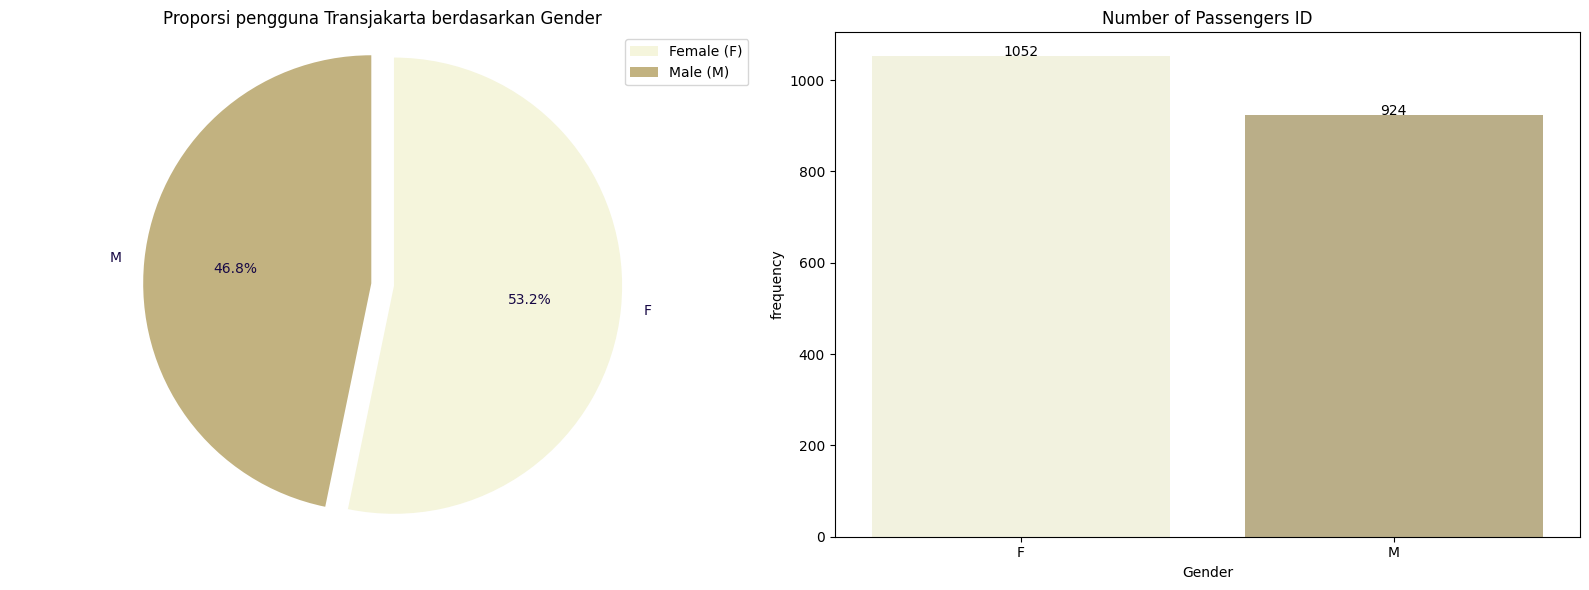

In [ ]:
# Create a figure with two subplots
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot on the left
sns.barplot(x='payCardSex', y='count', data=grouped_gen, palette=['#F5F5DC', '#C2B280'], ax=ax1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('frequency')
ax1.set_title('Number of Passengers ID')
for index, row in grouped_gen.iterrows():
    ax1.text(row.name, row['count'], round(row['count'], 2), color='black', ha="center")

# Pie chart on the right
ax2.pie(gender_counts['count'],
        labels=gender_counts['payCardSex'],
        autopct='%.1f%%',
        colors=['#F5F5DC', '#C2B280'],
        startangle=90,
        counterclock=False,
        explode=[0.1, 0],
        textprops={'color': '#170845'})
ax2.axis('equal')
ax2.legend(['Female (F)', 'Male (M)'], loc='upper right')
ax2.set_title('Proporsi pengguna Transjakarta berdasarkan Gender')

# Layout and show
plt.tight_layout()
plt.show()

- Pie Diagram (diagram kanankanan) di atas menggambarkan proporsi jumlah transaksi Transjakarta berdasarkan gender. yang didapatkan dari perhitungan proporsi transaksi berdasarkan "payCardSex" dengan asumsi bahwa gender pengguna Transjakarta sesuai dengan jenis kelamin yang terdaftar pada kepemilikan kartu atau pay card owner.
- dapat dilihat juga bahwa frekuensi dari pengguna transjakarta adalah lebih tinggi dbandng penumpang  pria.
- Dapat dilihat bahwa proporsi penumpang wanita lebih tinggi sekitar 6.48% dibandingkan dengan proporsi penumpang pria (diagram kiri) . Dari proporsi ini memang diketahui bahwa perbedaan proporsi keduanya tidak terlalu besar. kendati demikian, dengan adanya kebijakan inklusif armada khusus untuk wanita yang bertujuan memberikan rasa aman dari tindak kejahatan seksual yang sering terjadi di area operasional TransJakarta, proporsi ini dapat menjadi acuan bahwa penumpang wanita masih mendominasi. Kebijakan TransJakarta dalam menyediakan fasilitas bus khusus wanita sudah tepat sasaran dan efektif.

### Persebaran usia

In [ ]:
# persebaran usia berdasarkan transaksi
# Menghitung jumlah penumpang untuk setiap kategori usia
ageCategoryCount_all = tj_btc['ageCategory'].value_counts().reset_index()
ageCategoryCount_all.columns = ['ageCategory', 'count']

# Menghitung total semua kategori usia
total_count = ageCategoryCount_all['count'].sum()

# Menambahkan kolom persentase
ageCategoryCount_all['percentage'] = (ageCategoryCount_all['count'] / total_count) * 100

ageCategoryCount_all

,ageCategory,count,percentage
0,Dewasa,28096,79.358265
1,Remaja,5844,16.506609
2,Anak-anak (PG),754,2.129703
3,Lansia,710,2.005423


In [ ]:
ageCategoryCount = tj_btc.groupby('payCardID')['ageCategory'].value_counts().reset_index(name='count')

In [ ]:
# persebaran usia berdasarkan paycard ID
grouped_ageCategoryCount = ageCategoryCount['ageCategory'].value_counts().reset_index()
grouped_ageCategoryCount
total_users = grouped_ageCategoryCount['count'].sum()
grouped_ageCategoryCount['percentage'] = (grouped_ageCategoryCount['count'] / total_users) * 100
grouped_ageCategoryCount

,ageCategory,count,percentage
0,Dewasa,1566,79.251012
1,Remaja,331,16.751012
2,Lansia,41,2.074899
3,Anak-anak (PG),38,1.923077


<ipython-input-216-009ba85b7aba>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_ageCategoryCount, x='ageCategory', y='count', ax=axes[1], palette=tj_color[1:])


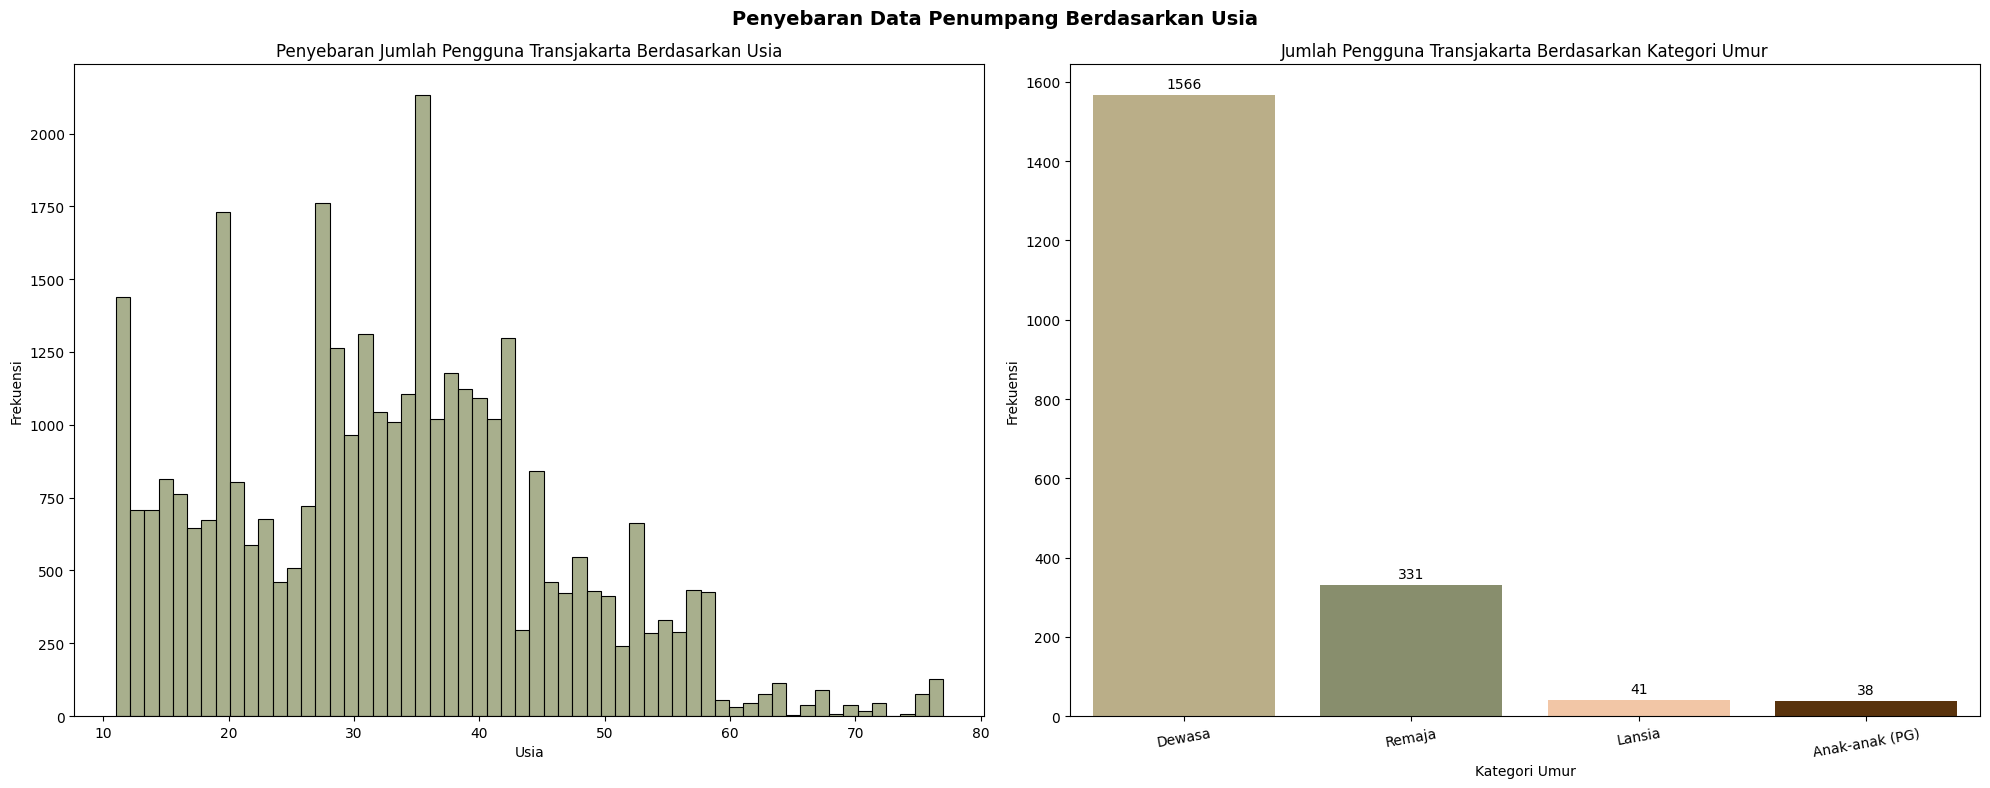

In [ ]:
tj_color = ['#F5F5DC', '#C2B280', '#8B9467', '#FFC499', '#663300']

# Membuat subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Penyebaran Data Penumpang Berdasarkan Usia', size=14, fontweight='bold')

# Histogram untuk distribusi usia
sns.histplot(data=tj_btc, x='age', ax=axes[0], color=tj_color[2])
axes[0].set_title('Penyebaran Jumlah Pengguna Transjakarta Berdasarkan Usia')
axes[0].set_xlabel('Usia')
axes[0].set_ylabel('Frekuensi')

# Barplot untuk kategori umur
sns.barplot(data=grouped_ageCategoryCount, x='ageCategory', y='count', ax=axes[1], palette=tj_color[1:])
axes[1].set_title('Jumlah Pengguna Transjakarta Berdasarkan Kategori Umur')
axes[1].set_xlabel('Kategori Umur')
axes[1].set_ylabel('Frekuensi')

# Menambahkan anotasi pada setiap bar di barplot
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Rotasi label x-axis untuk barplot
axes[1].tick_params(axis='x', rotation=10)

# Menghilangkan grid
axes[0].grid(False)
axes[1].grid(False)

# Menyesuaikan tata letak dan menampilkan grafik
plt.tight_layout()
plt.show()

Dengan asumsi bahwa usia penumpang transjakarta adalah sesuai dengan yang tercantum pada data payCardBirthDate, maka hasil pesebaran data nya adalah sebagai berikut:
- berdasarkan histogram (diagram kiri), dapat dilihat bahwa pengguna terbanyak Transjakarta berada pada usia 36 tahun, usia pengguna termuda 11 tahun, dan usia tertua adalah 76 tahun dengan pengguna paling sedikit adalah pengguna berusia 69 tahun.
- visualisasi diatas menunjukkan bahwa rentang usia dari pengguna jasa Transjakarta sangat beragam namun didominasi oleh kategori dewasa ( 19-60 tahun) sebanyak 1612 data pengguna.
- pada analisis ini, dapat dilihat juga bahwa penumpang yang tergolong sebagai lansia menempati posisi ketiga, angka pencatatan 41 pengguna

## Pola Perjalanan

### Pengguna Layanan berdasarkan tipe layanan

In [ ]:
pengguna = tj_btc[['corridorName', 'typeofTJ']]
pengguna_counts = pengguna['typeofTJ'].value_counts().reset_index()
pengguna_counts

,typeofTJ,count
0,Transjakarta,19089
1,Jaklingko,12969
2,RoyalTrans,1646
3,Transjabodetabek,1491
4,Angkutan Wisata,209


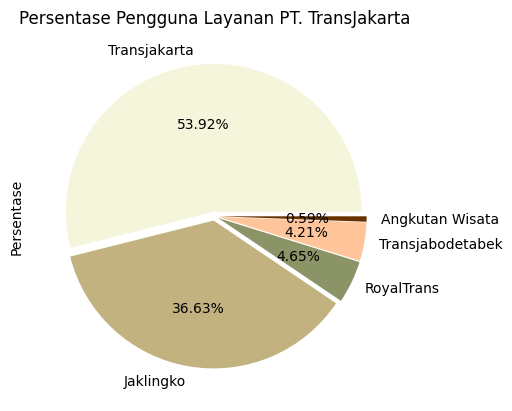

In [ ]:
tj_color = ['#F5F5DC', '#C2B280', '#8B9467', '#FFC499', '#663300']

num_categories = tj_btc['typeofTJ'].nunique()
explode_values = [0.03] * num_categories
tj_btc['typeofTJ'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=explode_values, colors=tj_color)
plt.title('Persentase Pengguna Layanan PT. TransJakarta')
plt.ylabel('Persentase')
plt.show()

Dari tabel dan grafik diatas dapat dilihat bahwa top 3 layana yang digunakan didominasi oleh layanan BRT-Transjakarta sebesar 53.92% dengan jumlah transaksi 19089, disusul oleh jakLingko dengan 36.63% dan RoyalTrans sebesar 4.65%.

Pembagian tipe layanan berdasarkanjenis kelamin

In [ ]:
import pandas as pd
grouped_data = tj_btc.groupby(['typeofTJ', 'payCardSex']).size().reset_index(name='count')
total_per_typeofTJ = tj_btc.groupby('typeofTJ').size().reset_index(name='total')
merged_data = pd.merge(grouped_data, total_per_typeofTJ, on='typeofTJ')
merged_data['percentage'] = (merged_data['count'] / merged_data['total']) * 100
result = merged_data[['typeofTJ', 'payCardSex', 'percentage']]
result

,typeofTJ,payCardSex,percentage
0,Angkutan Wisata,F,74.162679
1,Angkutan Wisata,M,25.837321
2,Jaklingko,F,53.496800
3,Jaklingko,M,46.503200
4,RoyalTrans,F,54.252734
5,RoyalTrans,M,45.747266
6,Transjabodetabek,F,41.046278
7,Transjabodetabek,M,58.953722
8,Transjakarta,F,53.695846
9,Transjakarta,M,46.304154


<Figure size 1000x600 with 0 Axes>

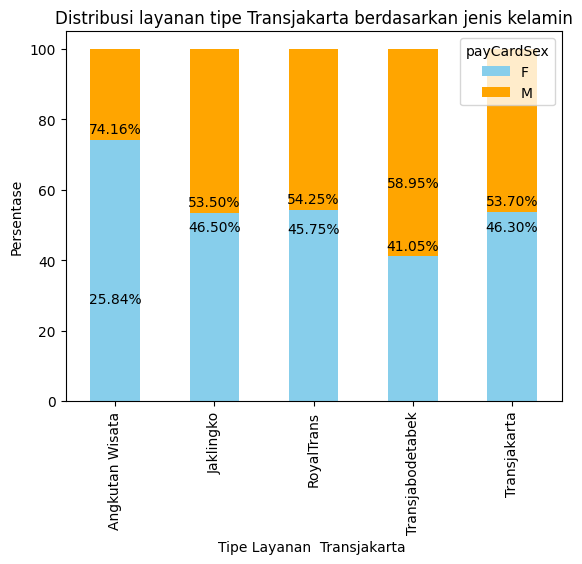

In [ ]:
import matplotlib.pyplot as plt

# Pivot hasil untuk menghasilkan bar
pivoted_result = result.pivot(index='typeofTJ', columns='payCardSex', values='percentage')

# Plot hasil
plt.figure(figsize=(10, 6))
pivoted_result.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Tipe Layanan  Transjakarta ')
plt.ylabel('Persentase')
plt.title('Distribusi layanan tipe Transjakarta berdasarkan jenis kelamin')
plt.legend(title='payCardSex')

# Tambahkan label nilai persentase
for i, (typeofTJ, percentages) in enumerate(pivoted_result.iterrows()):
    for j, (payCardSex, percentage) in enumerate(percentages.items()):
        if percentage > 0:
            plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()

### Koridor yang banyak digunakan untuk masing-masing segment usia

In [ ]:
age_corridor_counts = tj_btc.groupby(['ageCategory', 'corridorName']).size().reset_index(name='count')
most_used_corridors = age_corridor_counts.loc[age_corridor_counts.groupby('ageCategory')['count'].idxmax()]
most_used_corridors_sorted = most_used_corridors.sort_values(by='count', ascending=False)
most_used_corridors_sorted

,ageCategory,corridorName,count
226,Dewasa,Rusun Rawa Bebek - Kodamar,303
539,Remaja,TU Gas - Bundaran Senayan,121
327,Lansia,Ragunan - Gelora Bung Karno,73
18,Anak-anak (PG),Kampung Melayu - Ragunan,42


Dari hasil data diatas, dapat dilihat bahwa setiap segmen usia memiliki koridor tersibuk yang berbeda.

### top 5 korridor bagi pengguna wanita

In [ ]:
top5_corF = tj_btc[tj_btc['payCardSex']=='F']['corridorName'].value_counts().reset_index().sort_values(by='count', ascending=False).head(5)
top5_corF

,corridorName,count
0,Pasar Minggu - Tanah Abang,220
1,Poris Plawad - Bundaran Senayan,213
2,Rusun Rawa Bebek - Kodamar,209
3,Terminal Tanah Merah - Pulo Gadung,196
4,Cilangkap - Cililitan,195


<ipython-input-227-479bd4cc02e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='corridorName', y='count', data=top5_corF, palette=transjakarta2_colors)


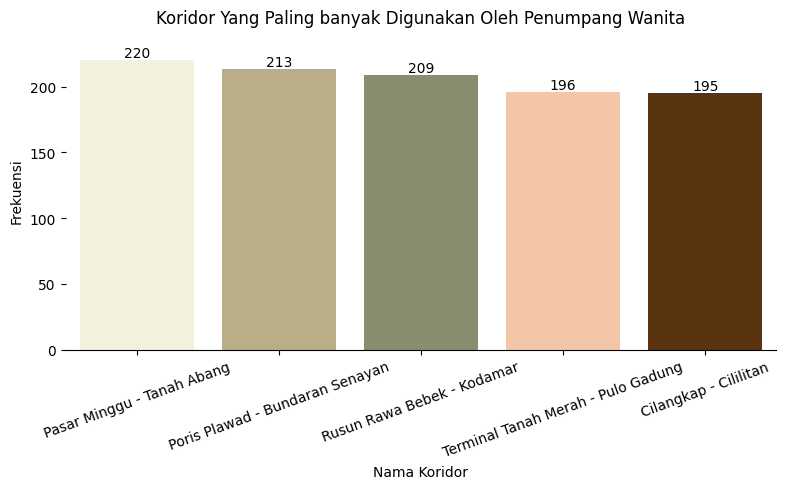

In [ ]:
transjakarta2_colors = ['#F5F5DC', '#C2B280', '#8B9467', '#FFC499', '#663300']
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='corridorName', y='count', data=top5_corF, palette=transjakarta2_colors)

plt.xlabel('Nama Koridor')
plt.ylabel('Frekuensi')
plt.title('Koridor Yang Paling banyak Digunakan Oleh Penumpang Wanita')
plt.xticks(rotation=20)
plt.ylim(0, top5_corF['count'].max() * 1.1)
sns.despine(left=True, top=True)
max_count = top5_corF['count'].max()
ax.grid(False)

# menambah annotasi
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(),
            f'{p.get_height():.0f}', ha='center', va='bottom', size=10)

plt.tight_layout()
plt.show()

- pada Desember 2022, dinyatakan telah dilakukan penambahan armada bus khusus perempuan sebanyak 10 bus, dari 10 bus yang telah beroperasi sebelumnya [20 bus di Des2022](https://megapolitan.kompas.com/read/2022/12/01/10290611/bus-pink-transjakarta-warisan-ahok-yang-masih-eksis-hingga-kini), dan pada akhir Februari 2023, dinyatakan bahwa Transjakarta memiliki 20 Unit tambahan dengan jangkauan total menjadi 7 rute [20 unit armada - 7 rute](https://www.kompas.com/properti/read/2023/03/02/163000421/transjakarta-perluas-jangkauan-bus-pink-khusus-wanita-cek-di-sini).
- Fasilitas bus khusus wanita kini telah melayani 8 koridor yaitu: koridor 1 (blok m- kota), Koridor 2 (Pulogadung-Harmoni), Koridor 3 (Kalideres-Pasar Baru), Koridor 9 (Pinang ranti-Pluit), Koridor 13 (Ciledug-Tendean) dan PGC-Harmoni (5C), dan koridor 6 (Ragunan- Dukuh Atas), dan koridor 13C (Puribeta-Dukuh Atas) (perlu dilakukan pengkajian ulang terkait perluasan rute) <br>
[perluasan layanan bus pink 2023](https://transjakarta.co.id/tranjakarta-perluas-layanan-bus-pink-di-lima-koridor/) <br>[rute awal bus pink 2022](https://www.gridoto.com/read/223596831/transjakarta-tambah-10-unit-armada-bus-pink-beroperasi-di-tiga-rute-ini)

- berdasarkan visualisasi diatas dan dataset yang dimiliki, dapat dilihat bahwa terdapat beberapa koridor yang banyak digunakan oleh penumpang wanita namun belum mendapatkan fasilitas layanan bus khusus wanita. Memang kebijakan terkait bus khusus wanita ini tidak serta-merta didasarkan pada koridor yang paling umum digunakan penumpang wanita, namun hal ini dapat dijadikan bahan pertimbangan dalam membuat keputusan terkait koridor mana yang perlu di prioritaskan.


In [ ]:
import pandas as pd

list_pink_bus = ['1','2','3','9','13','5C','6','13C']
filtered_df = tj_btc[tj_btc['corridorID'].isin(list_pink_bus)]

female_passengers = filtered_df[filtered_df['payCardSex'] == 'F']
male_passengers = filtered_df[filtered_df['payCardSex'] == 'M']

# groupping pengguna wanita
female_result = female_passengers.groupby('corridorID')['payCardSex'].count().reset_index()
female_result = pd.merge(female_result, tj_btc[['corridorID', 'corridorName']].drop_duplicates(), on='corridorID')
female_result.columns = ['corridorID', 'total_female_passengers', 'corridorName']

# grouping pengguna pria
male_result = male_passengers.groupby('corridorID')['payCardSex'].count().reset_index()
male_result.columns = ['corridorID', 'total_male_passengers']

# Merge wanita and pria
result = pd.merge(female_result, male_result, on='corridorID')

# menghitung persentase tiap gender
result['percentage_female_passengers'] = (result['total_female_passengers'].astype(int) / len(tj_btc)) * 100
result['percentage_male_passengers'] = (result['total_male_passengers'].astype(int) / len(tj_btc)) * 100

result

,corridorID,total_female_passengers,corridorName,total_male_passengers,percentage_female_passengers,percentage_male_passengers
0,1,38,Blok M - Kota,190,0.107333,0.536663
1,13,160,Ciledug - Tendean,76,0.451926,0.214665
2,13C,81,Puri Beta - Dukuh Atas,49,0.228788,0.138402
3,2,116,Pulo Gadung - Monas,159,0.327647,0.449102
4,3,115,Kalideres - Bundaran HI via Veteran,9,0.324822,0.025421
5,5C,119,PGC - Juanda,117,0.336120,0.330471
6,6,47,Ragunan - Dukuh Atas 2,151,0.132753,0.426505
7,9,5,Pinang Ranti - Pluit,56,0.014123,0.158174


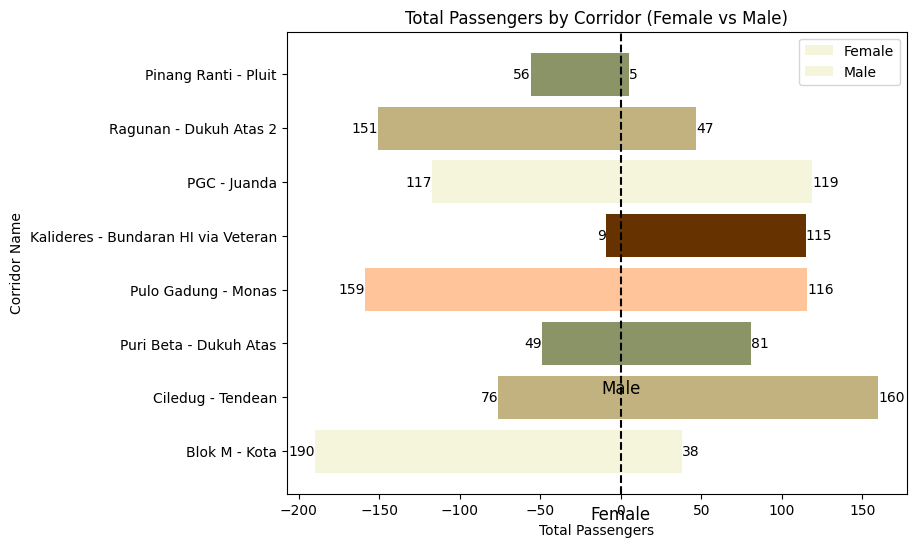

In [ ]:
import matplotlib.pyplot as plt


#custon palette
palette = ['#F5F5DC', '#C2B280', '#8B9467', '#FFC499', '#663300']

fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(result['corridorName'], result['total_female_passengers'], color=[palette[i%len(palette)] for i in range(len(result))], label='Female')

ax.barh(result['corridorName'], -result['total_male_passengers'], color=[palette[i%len(palette)] for i in range(len(result))], label='Male')

#annotasi
ax.text(0, -1, 'Female', ha='center', va='top', fontsize=12)
ax.text(0, 1, 'Male', ha='center', va='bottom', fontsize=12)

for i, (female_count, male_count) in enumerate(zip(result['total_female_passengers'], result['total_male_passengers'])):
    ax.text(female_count, i, f'{female_count}', ha='left', va='center', fontsize=10)
    ax.text(-male_count, i, f'{male_count}', ha='right', va='center', fontsize=10)

ax.set_title('Total Passengers by Corridor (Female vs Male)')
ax.set_xlabel('Total Passengers')
ax.set_ylabel('Corridor Name')

ax.axvline(x=0, color='k', linestyle='--')

ax.legend()
plt.show()

dari data diatas:
grafik disebelah kanan menunjukan proporsi untuk laki-laki, dan sebelah kiri proporsi untuk perempuan.
- dapat dilihat bahwa terdapat 4 koridor yang memiliki jumlah pengguna dibawah 100. Bahkan nilai tertinggi dari halte yang dilayani oleh bus khusus wanita  (Ciledug Tendean) hanya terdata 160 transaksi.
- setiap korridor yang melayani armada transjakarta khusus wanita memiliki pengguna wanita lebih sedikit dibanding 5 top koridor yang sebetulnya banyak digunakan oleh pengguna wanita. Hal ini mengindikasi kurang tepatnya rute pelayanan bus khusus wanita yang telah disediakan.
- sebaiknya dilakukan evaluasi kembali mengenai rute/ koridor khusus wanita yang ada karena, berdasarkan tabel dan visualisasi diatas, seluruh rute yang dilayani diconsidare sebagai low performance route karena performance bahkan tidak sampai 10%.
- dapat dilihat bahwa proporsi untuk pengguna pria dikoridor layan bus Transjakarta khusus wanita memiliki proporsi yang hampir sama.
- Namun pergantian rute layan transjakarta sebaiknya dilakukan untuk ke 5 rute dengan pengguna wanita terbanyak. dapat dilakukan opsi rukar koridor atau menambahkan armada transjakarta khusus wanita di koridor yang padat pengguna wanita.

### Waktu dominan perjalanan wanita

In [ ]:
# Filter data wanita
female_passengers = tj_btc[tj_btc['payCardSex'] == 'F']

# menghitung tap-in
tap_in_hour_counts = female_passengers['tapInHour'].value_counts().reset_index().sort_values(by='tapInHour')
tap_in_hour_counts.columns = ['tapInHour', 'count']

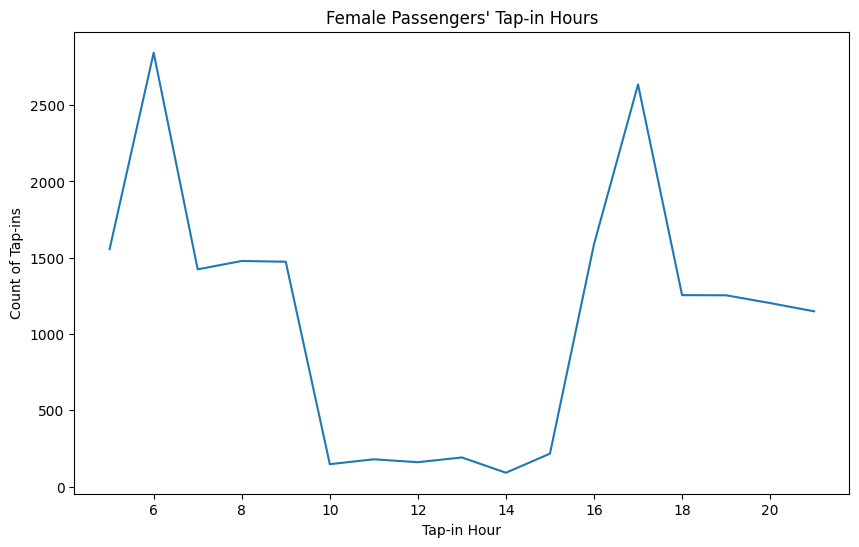

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(tap_in_hour_counts['tapInHour'], tap_in_hour_counts['count'])
plt.xlabel('Tap-in Hour')
plt.ylabel('Count of Tap-ins')
plt.title('Female Passengers\' Tap-in Hours')
plt.show()

waktu puncak pengguna perempuan emenggunakan layanan transjakarta adalah pada pukul 6 pagi dan 15 sore.

### top 5 koridor oleh pengguna Transjakarta

Dari folium sebelumnya kita hanya mengetahui daerah jakarta mana sebagai heat locationnya. untuk lebih spesifik koridor mana yang tersibuk/paling banyak digunakan, kita dapat melihat pada analisis data dibawah ini.

In [ ]:
corridorInfo = tj_btc.groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
corridorInfoTop10 = corridorInfo.sort_values(by='Count', ascending=False).head(5)
corridorInfoTop10

,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,384
216,S21,Ciputat - CSW,376
196,JIS3,Harmoni - Jakarta International Stadium,333
120,JAK.06,Kampung Rambutan - Pondok Gede,327
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,323


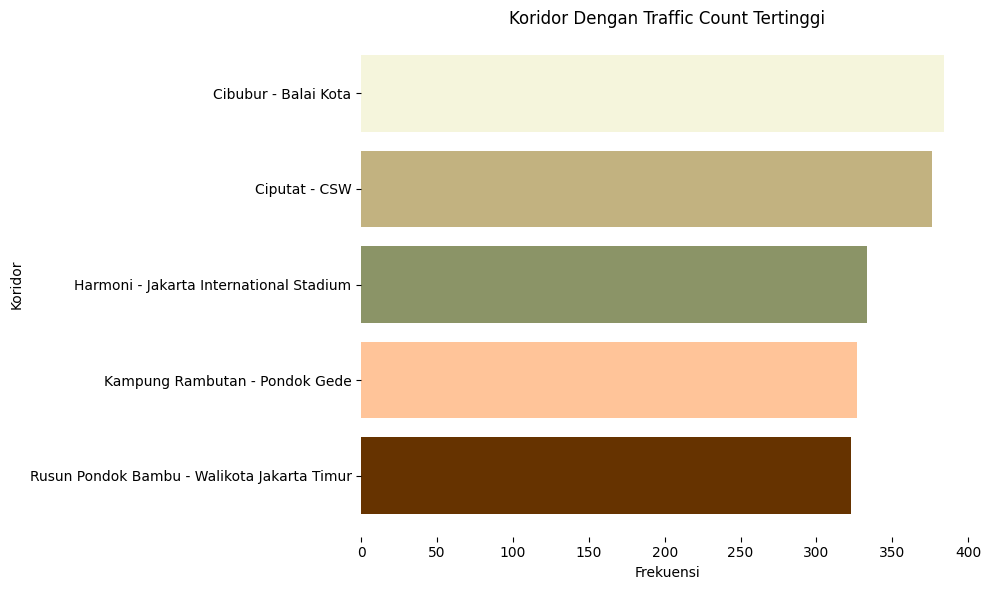

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(corridorInfoTop10['corridorName'], corridorInfoTop10['Count'], color=tj_color)
plt.xlabel('Frekuensi')
plt.ylabel('Koridor')
plt.title('Koridor Dengan Traffic Count Tertinggi')
plt.gca().invert_yaxis()
plt.grid(False)

for ax in plt.gcf().get_axes():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

Berdasarkan barchart yang ditunjukkan, koridor yang paling sering digunakan adalah koridor 1T dengan rute Cibubur-Balai Kota, yang melintasi wilayah Jakarta Selatan dan Jakarta Pusat. Halte di sepanjang koridor ini menyediakan akses ke area perkantoran di Jakarta. Selain itu, koridor-koridor terpadat lainnya juga melintasi wilayah Jakarta Pusat dan Selatan. Oleh karena itu, untuk mengevaluasi efisiensi koridor dan armada secara menyeluruh, PT. TransJakarta sebaiknya memusatkan perhatian di wilayah ini. Hal ini karena koridor ini tetap memiliki tingkat penggunaan yang tinggi bahkan di luar jam sibuk.

 ### Perjalanan Secara Keseluruhan

Pada bagian ini, pola perjalanan penumpang ditujukan untuk melakukan evaluasi terhadap efisiensi atau kinerja rute dan armada dalam melayani penumpang.
Pola perjalanan secara garis besar dapat dilihat pada heatspot atau folium dibawah ini

- TapIn Folium

In [ ]:
import folium
from folium.plugins import MarkerCluster
coords = tj_btc[['tapInStopsLat', 'tapInStopsLon']].dropna()

#membuat map dari mean
m1 = folium.Map(
    location=[coords['tapInStopsLat'].mean(), coords['tapInStopsLon'].mean()],
    tiles='CartoDB positron',
    zoom_start=11
)

# membuat cluster
marker_cluster = MarkerCluster().add_to(m1)

# membuat marker
for idx, row in coords.iterrows():
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        popup=f"Latitude: {row['tapInStopsLat']}, Longitude: {row['tapInStopsLon']}"
    ).add_to(marker_cluster)

m1


Output hidden; open in https://colab.research.google.com to view.

TapOut Folium

In [ ]:
coords = tj_btc[['tapOutStopsLat', 'tapOutStopsLon']].dropna()

# membuat map beerdasarkan mean. koordinat
m1 = folium.Map(
    location=[coords['tapOutStopsLat'].mean(), coords['tapOutStopsLon'].mean()],
    tiles='CartoDB positron',
    zoom_start=11
)
marker_cluster = MarkerCluster().add_to(m1)

# Add marker untuk tiap tapout
for idx, row in coords.iterrows():
    folium.Marker(
        location=[row['tapOutStopsLat'], row['tapOutStopsLon']],
        popup=f"Latitude: {row['tapOutStopsLat']}, Longitude: {row['tapOutStopsLon']}"
    ).add_to(marker_cluster)

m1


Output hidden; open in https://colab.research.google.com to view.

- Berdasarkan kedua folium diatas dapat diketahui bahwa wilayah penggunaan Transjakarta banyak berpusat pada daerah jakarta pusat dan jakarta selatan. Namun jika diteliti lebih lanjut ada sedikit pergeseran wilayah (heat location) antara lokasi Tap in dan Tap Out. Pada folium pertama, terdapat peak dan persebaran wilayah terlihat lebih menyebar di sekitar wilayah jakarta timur, pusat, selatan dan utara. Ini menandakan bahwa banyak penumpang yang memulai perjalanan titik awal (tap in) pada daerah tersebut. Sedangkan pada folium kedua (tap out) heat locationnya lebih berpusat kearah tengah di wilayah jakarta pusat dan selatan. Ini menandakan bahwa banyak pengguna transjakarta yang bertujuan ke wilayah jakarta pusat dan selatan.
- jadi pada kesimpulannya, berdasarkan folium, titik lokasi transjakarta yang banyak digunakan adalah berada pada wilayah jakarta selatan dan pusat.
- Kecenderungan peak point tersebut sangat wajar dikarenakan Jakarta pusat dan selatan adalah wilayah perkantoran dan merupakan wilayah yang sibuk. Pengguna transjakarta yang didominasi oleh orang dewasa yang berkerja sangat mungkin menggunakan transjakarta sebagai transportasi untuk bekerja.

 ## Penggunaan layanan berdasarkan waktu

Untuk efisiensi dan optimalisasi koridor perlu diperhatikan berdasarkan rush hour agar analisis menjadi lebih tepat sasaran. Umumnya, pada saat jam sibuk akan terjadi over croweded, dan cenderung menurun drastis setelah melewati jam sibuk.

### Rush hours harian

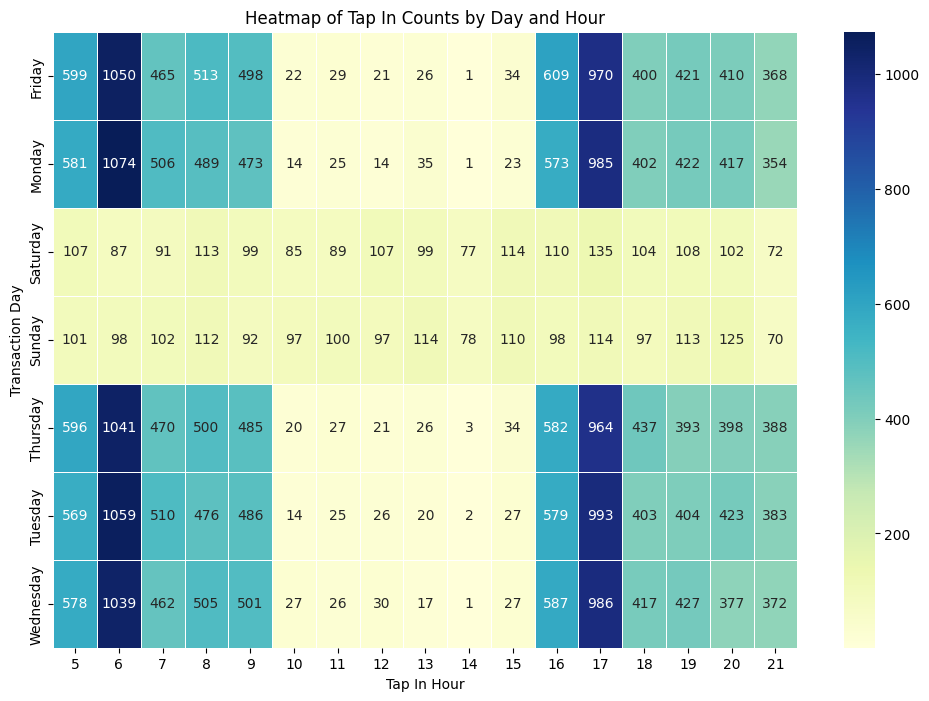

In [ ]:
rush_hour = pd.crosstab(tj_btc['trans_day'], tj_btc['tapInHour'])
plt.figure(figsize=(12, 8))
sns.heatmap(rush_hour, cmap='YlGnBu', annot=True, fmt='d', cbar=True, linewidths=.5)
plt.title('Heatmap of Tap In Counts by Day and Hour')
plt.xlabel('Tap In Hour')
plt.ylabel('Transaction Day')
plt.show()

- Berdasarkan heatmap diatas, dapat dikategorikan waktu sibuk penggunaan transjakarta kedalam dua kategori yaitu:
    - Morning rush hour= pada pukul 5am-9am, dengan peak hour pada pukul 6am
    - Evening rush hour= pada pukul 4pm-21pm, dengan peak hour di pukul 5 pm
  rush Hour tersebut dapat terjadi karena merupakan jam mobilitas berangkat dan pulang kerja bagi seebagian pegawai.
- Penggunaan Transjakarta mengalami penurunan pada weekend
- dengan analisis harian, Senin pukul 6 pagi menjadi puncak penggunaan transjakarta dalam sepekan.
- Dari analisis waktu sibuk ini, dapat dijadikan acuan dalam optimalisasi dan efisiensi kinerja trayek dan armada yang lebih relevan.

### Penggunaan Transjakarta di rush hour - jam

Pola perjalanan perlu dianalisis tidak hanya berdasarkan koridor teramai, tetapi juga halte yang paling padat untuk membantu mengoptimalkan armada dan mengatasi masalah kepadatan di halte. Berdasarkan sumber eksternal, overcrowed masih menjadi masalah di beberapa halte, terutama di koridor yang sering digunakan. Hal ini terjadi atas beberapa faktor seperti kemacetan, gangguan jalur, dan jumlah armada yang tidak mencukupi. Oleh karena itu, evaluasi dapat dilakukan dengan:

1. Mengidentifikasi koridor terpadat selama jam sibuk untuk mengalokasikan armada secara efisien, dengan memindahkan armada dari koridor yang lebih sepi ke yang lebih sibuk.
2. Merevitalisasi halte dengan potensi overcrowding tinggi, sehingga meskipun penumpang harus menunggu, mereka tetap merasa nyaman dan tidak berdesakan.

### Koridor yanng digunakan saat rush hour

In [ ]:
def rush_time(cols):
    if 5 <= cols <= 9:
        return 'Morning Rush Hour'
    elif 16 <= cols <= 20:
        return 'Evening Rush Hour'
    else:
        return 'Non Rush Hour'

tj_btc['rush_hour'] = tj_btc['tapInHour'].apply(rush_time)

In [ ]:
tj_btc.head(1)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,trans_day,tapInWeek,tapInDay,tapInHour,tapInMinute,tapOutDay,tapOutHour,tapOutMinute,typeofTJ,age,ageCategory,rush_hour
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Monday,03,3,5,21,3,6,0,Transjakarta,15,Remaja,Morning Rush Hour


**5 koridor tersibuk berdasarkan morning rush Hour**

In [ ]:
morning_rush_hour = tj_btc[tj_btc['rush_hour'] == "Morning Rush Hour"].groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
morning_rush_hour = morning_rush_hour.sort_values(by='Count', ascending=False).head(5)
morning_rush_hour

,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,191
216,S21,Ciputat - CSW,183
196,JIS3,Harmoni - Jakarta International Stadium,161
120,JAK.06,Kampung Rambutan - Pondok Gede,158
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,158


**5 Koridor tersibuk saat Evening Rush Hour**

In [ ]:
evening_rush_hour= tj_btc[tj_btc['rush_hour'] == "Evening Rush Hour"].groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
evening_rush_hour= evening_rush_hour.sort_values(by='Count', ascending=False).head(5)
evening_rush_hour

,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,164
196,JIS3,Harmoni - Jakarta International Stadium,143
93,8C,Kebayoran Lama - Tanah Abang,142
120,JAK.06,Kampung Rambutan - Pondok Gede,141
216,S21,Ciputat - CSW,139


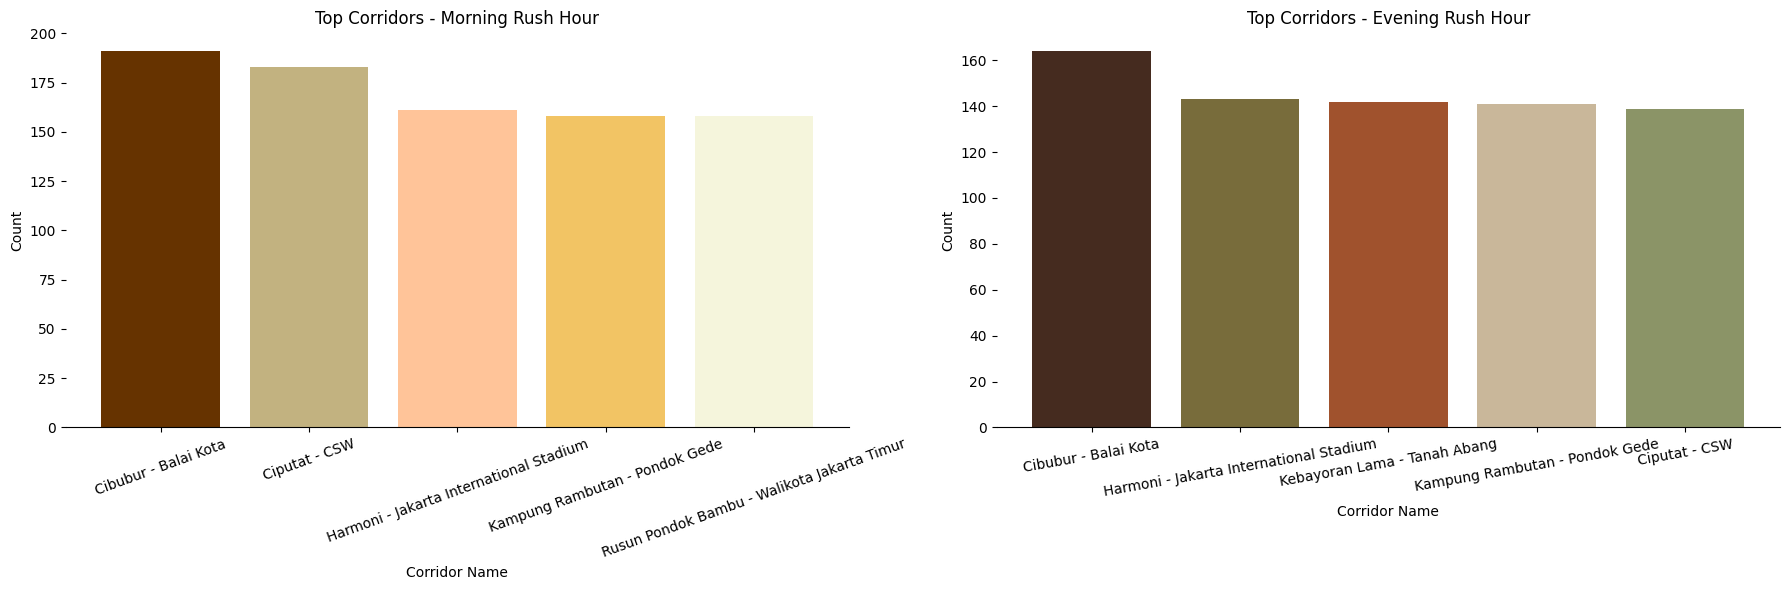

In [ ]:
right_colors = [
  "#452B1F",
  "#786C3B",
  "#A0522D",
  "#C9B79A",
  "#8B9467",
  "#F5F5DC"
]

left_colors = [
  "#663300",
  "#C2B280",
  "#FFC499",
  "#F2C464",
  "#F5F5DC",
  "#F2C464"
]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].bar(morning_rush_hour['corridorName'], morning_rush_hour['Count'], color=left_colors)
axes[0].set_title('Top Corridors - Morning Rush Hour')
axes[0].set_xlabel('Corridor Name')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=20)
axes[0].grid(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)

axes[1].bar(evening_rush_hour['corridorName'], evening_rush_hour['Count'], color=right_colors)
axes[1].set_title('Top Corridors - Evening Rush Hour')
axes[1].set_xlabel('Corridor Name')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=10)
axes[1].grid(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)

plt.tight_layout()

plt.show()


- dari diagram diatas, dapat dilihat 5 koridor untuk tiap rush Hour yang ada (kiri = morning rush hour, kanan = evening rush hour), dengan pola yang cenderung sama sama dengan top 5 koridor oleh pengguna transjakarta.
- Koridor 1T atau cibubur-balai kota menjadi  koridor tersibuk ditiap rush hour karena berada diwilayah perkantoran dengan persentase 22,44% .
- hal ini dapat menjadi insight bagi PT. Transportasi Jakarta dalam peningkatan pelayanan terhadap pengguna layanan. seperti: peningkatan kapasitas
- PT. Transjakarta dapat mengalihkan ataupun menambah armada sesuai kebutuhahan, kapasitas, dan waktu sibuk pada halte-halte di atas.
- hasil dari analisis data pola perjalanan selanjutnya dapat dijadikan bahan evaluasi terkait dengan analisis kapasitas jika terdapat informasi jumlah armada yang di miliki Transjakarta dan juga jumlah armada yang di operasikan (analisis kapasitas).
- Namun demikian, dari hasil barchart di atas tetap dapat disimpulkan bahwa koridor-koridor yang tertera adalah koridor yang perlu diperhatikan terkait dengan optimalisasi dan efisiensi armada.

### top 5 halte pada rush hour

- tapIn

**Morning rush hour pukul 5-9**

In [ ]:
morning_rush_tapIn= tj_btc[tj_btc['rush_hour'] == "Morning Rush Hour"].groupby(['tapInStops', 'tapInStopsName']).size().reset_index(name='Count')
morning_rush_tapIn= morning_rush_tapIn.sort_values(by='Count', ascending=False).head(5)
morning_rush_tapIn

,tapInStops,tapInStopsName,Count
1146,P00064,Garuda Taman Mini,135
590,B03277P,Rusun Kapuk Muara,98
1222,P00170,Penjaringan,88
1246,P00202,Rawa Selatan,79
1284,P00254,Tendean,79


**Evening rush hour pukul 16-21**

In [ ]:
evening_rush_tapIn= tj_btc[tj_btc['rush_hour'] == "Evening Rush Hour"].groupby(['tapInStops', 'tapInStopsName']).size().reset_index(name='Count')
evening_rush_tapIn= evening_rush_tapIn.sort_values(by='Count', ascending=False).head(5)
evening_rush_tapIn

,tapInStops,tapInStopsName,Count
1204,P00170,Penjaringan,122
63,B00248P,Cibubur Junction,94
1088,P00016,BKN,86
1199,P00164,Pejaten,79
1285,P00297,BNN LRT,78


- tapOut

**Morning rush hour pukul 5-9**

In [ ]:
morning_rush_tapOut= tj_btc[tj_btc['rush_hour'] == "Morning Rush Hour"].groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='Count')
morning_rush_tapOut= morning_rush_tapOut.sort_values(by='Count', ascending=False).head(5)
morning_rush_tapOut

,tapOutStops,tapOutStopsName,Count
1102,P00170,Penjaringan,166
999,P00016,BKN,153
1078,P00137,Monas,132
1065,P00112,Kejaksaan Agung,99
1096,P00161,Pecenongan,96


**Evening rush hour pukul 16-21**

In [ ]:
evening_rush_tapOut= tj_btc[tj_btc['rush_hour'] == "Evening Rush Hour"].groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='Count')
evening_rush_tapOut= evening_rush_tapOut.sort_values(by='Count', ascending=False).head(5)
evening_rush_tapOut

,tapOutStops,tapOutStopsName,Count
1006,P00016,BKN,126
841,B05725P,Term. Senen,116
1117,P00179,Pinang Ranti,96
832,B05708P,Term. Kampung Rambutan,87
513,B03277P,Rusun Kapuk Muara,82


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_tree_diagram(data, title, node_color):
    return go.Treemap(
        labels=data['tapInStopsName'] if 'tapInStopsName' in data.columns else data['tapOutStopsName'],
        parents=['']*len(data),
        values=data['Count'],
        marker=dict(colorscale=node_color, colors=data['Count']),
        textinfo="label+value")

fig = make_subplots(rows=2, cols=2, subplot_titles=(
    'Top 5 Tap In Stops - Morning Rush Hour',
    'Top 5 Tap In Stops - Evening Rush Hour',
    'Top 5 Tap Out Stops - Morning Rush Hour',
    'Top 5 Tap Out Stops - Evening Rush Hour'
), specs=[[{'type': 'treemap'}, {'type': 'treemap'}], [{'type': 'treemap'}, {'type': 'treemap'}]])

fig.add_trace(create_tree_diagram(morning_rush_tapIn.head(5), 'Top 5 Tap In Stops - Morning Rush Hour', 'Greens'), row=1, col=1)
fig.add_trace(create_tree_diagram(evening_rush_tapIn.head(5), 'Top 5 Tap In Stops - Evening Rush Hour', 'PuBu'), row=1, col=2)
fig.add_trace(create_tree_diagram(morning_rush_tapOut.head(5), 'Top 5 Tap Out Stops - Morning Rush Hour', 'Oranges'), row=2, col=1)
fig.add_trace(create_tree_diagram(evening_rush_tapOut.head(5), 'Top 5 Tap Out Stops - Evening Rush Hour', 'Greys'), row=2, col=2)

fig.update_layout(
    title_text='Tap In and Tap Out Stops Analysis',
    title_x=0.5,
    height=800,  # Adjust the height as needed
    width=1000,  # Adjust the width as needed
    showlegend=False
)
fig.show()


berdasarkan diagram diatas :
  - dapat diidentifikasi beberapa halte yang banyak digunakan khususnya pada rush hour. Hal ini dapat memberikan informasi pendukung bagi PT. Transjakarta dalam mengatasi overcrowed pada halte-halte diatas khususnya saat jam sibuk agar penggunaan armada bus untuk pelayanan dapat lebih optimal.
  - Bahan referensi dalam optimalissi fasilitas yang ada. Khususnya pada halte2 atau koridor dengan jumlah pengguna melebihi kapasitas tampung layanan.
  - dapat dilakukan observasi (berdasarkan google) terhadap halte kapasitas tampung halte dan fasilitas lainya:
    - halte yang sudah dilakujan revitalisasi BKN, BKN LRT, terminal Senen, monas, kejaksaan agung, bunderan senayan 1, Terminal kampung rambutan
    - Halte yang belum dilakukan revitalisasi dan perluasan namun padat penumpang garuda taman-mini, rusun muara-kapuk, penjaringan,rawa-selatan, cibubur junction

## Penggunaan Transjakarta pada weekend / hari libur

Periode april 2023 memiliki beberapa hari libur seperti hari libur lebaran dan cuti bersama. oleh karena itu pola penggunaan transjakarta pada periode ini perlu dievaluasi sebagai salah satu masukan untuk optimalisasi armada pada waktu-waktu libur mendatang.

### weekDay vs weekEnd

In [ ]:
passenger_count_per_week =tj_btc.groupby('tapInDay').size()

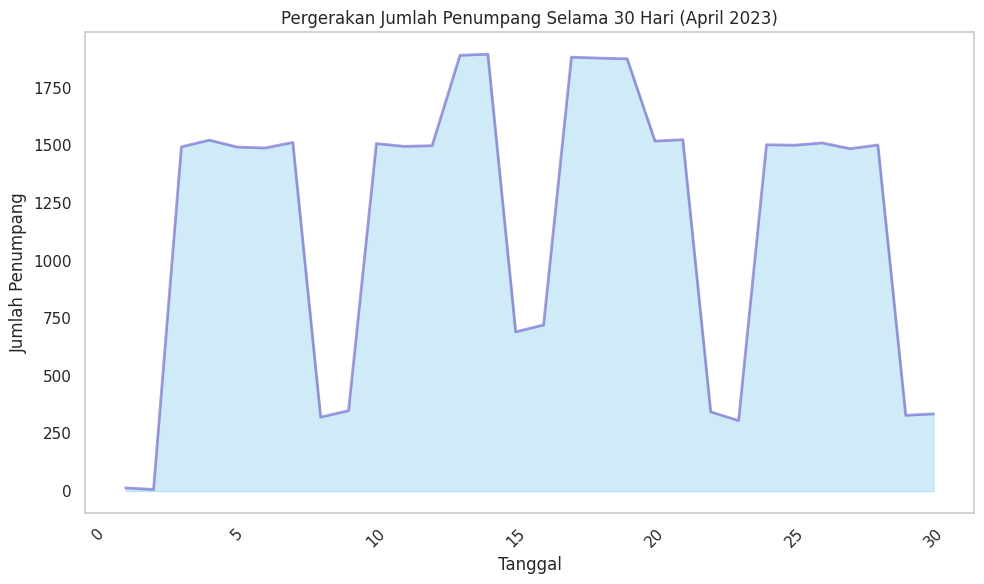

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.fill_between(passenger_count_per_week.index, passenger_count_per_week.values, color="skyblue", alpha=0.4)
plt.plot(passenger_count_per_week.index, passenger_count_per_week.values, color="Slateblue", alpha=0.6, linewidth=2)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.title('Pergerakan Jumlah Penumpang Selama 30 Hari (April 2023)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)

plt.show()

- **Tren Penggunaan Harian**: Penggunaan TransJakarta selama April 2023 berfluktuasi, mengikuti pola hari kerja dan akhir pekan.
- **Penurunan di Akhir Pekan**: Jumlah penumpang cenderung menurun signifikan saat akhir pekan.
- **Libur Lebaran**: Pada libur Lebaran tanggal 22 dan 23 April yang jatuh di akhir pekan, terjadi penurunan jumlah penumpang, namun masih ada 400-700 penumpang per hari.
- **Optimalisasi Armada**: Perlu dilakukan optimalisasi armada pada akhir pekan dan hari libur, misalnya dengan meratakan jam operasional dan mengalihkan bus wisata ke destinasi rekreasi.
- **Analisis Lanjutan**: Diperlukan analisis lebih lanjut untuk menentukan koridor yang ramai digunakan pada akhir pekan dan hari libur untuk meningkatkan efisiensi layanan.

### Week end rush hour

In [ ]:
weekend_df = tj_btc[tj_btc['trans_day'].isin(['Saturday', 'Sunday'])]
weekend_rush_hour = pd.crosstab(weekend_df['trans_day'], weekend_df['tapInHour'])
weekend_rush_hour

tapInHour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
trans_day,,,,,,,,,,,,,,,,,
Saturday,107,87,91,113,99,85,89,107,99,77,114,110,135,104,108,102,72
Sunday,101,98,102,112,92,97,100,97,114,78,110,98,114,97,113,125,70


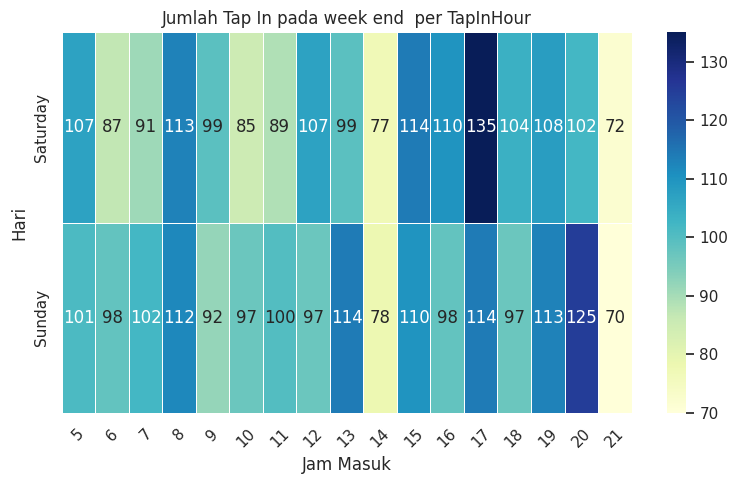

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.heatmap(weekend_rush_hour, cmap='YlGnBu', annot=True, fmt='d', cbar=True, linewidths=.5)
plt.xlabel('Jam Masuk')
plt.ylabel('Hari')
plt.title('Jumlah Tap In pada week end  per TapInHour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari heatmap diatas, dapat dilihat bajwa saat weekend, terjadi 2 kali lonjakan penumpang pada pukul 8 pagi, dan 5 sore, dan pada pukul lainya terlihat adanya perubahan jumlah penfgguna yang fluktuaif, sehingga tidak perlu dilakukan optimalisasi layanan yang ada.

### week end top pick corridor

Setelah mengetahui pesebaran waktu sibuk penggunaan transjakarta di akhir pekan, maka selanjutnya yang perlu dianalisis adalah koridor mana yang perlu di optimalisasikan melalui efisiensi armada.

In [ ]:
weekend_corridor = tj_btc[(tj_btc['trans_day'] == "Saturday") | (tj_btc['trans_day'] == "Sunday")].groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
weekend_corridor_sorted = weekend_corridor.sort_values(by='Count', ascending=False).head(5)
weekend_corridor_sorted

,corridorID,corridorName,Count
100,9C,Pinang Ranti - Bundaran Senayan,31
133,JAK.120,JIS - Terminal Muara Angke,31
140,JAK.19,Pinang Ranti - Kampung Rambutan,31
43,2B,Harapan Indah - ASMI,29
13,11N,Rusun Cipinang Muara - Jatinegara,27


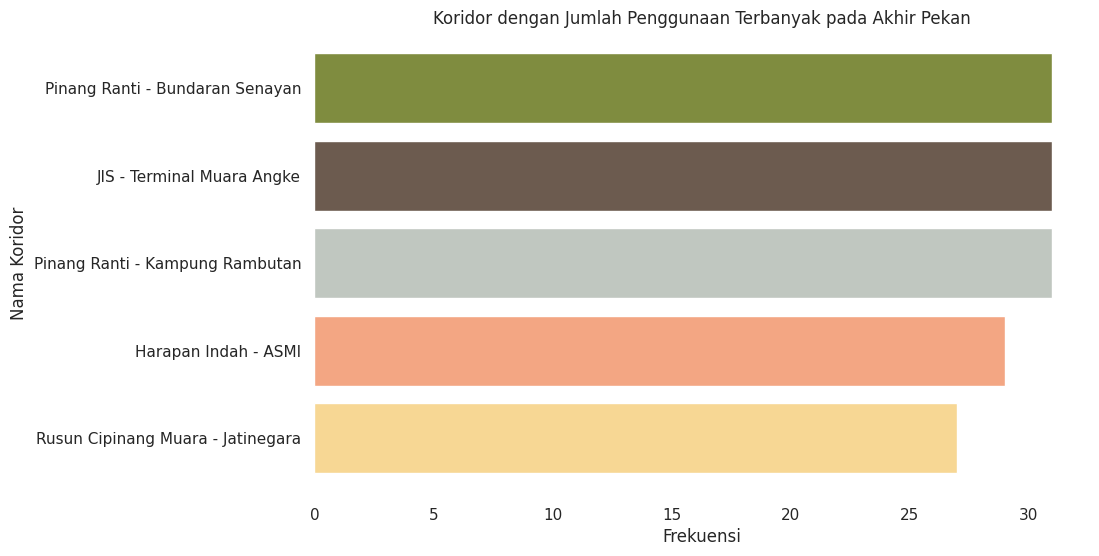

In [ ]:
import matplotlib.pyplot as plt

# Define an earth tone palette
earth_tone_colors = ['#7f8c3f', '#6c5b4f', '#c0c7c0', '#f3a683', '#f7d794', '#c44536', '#6c7a8c', '#f0e5cf', '#9f6f6c', '#b19c83']

plt.figure(figsize=(10, 6))
bars = plt.barh(weekend_corridor_sorted['corridorName'], weekend_corridor_sorted['Count'], color=earth_tone_colors)
plt.xlabel('Frekuensi')
plt.ylabel('Nama Koridor')
plt.title('Koridor dengan Jumlah Penggunaan Terbanyak pada Akhir Pekan')
plt.gca().invert_yaxis()
plt.grid(False)
plt.box(False)

plt.show()

- Dari barchart, terlihat bahwa beberapa koridor populer di akhir pekan adalah:
  1. **Pinang Ranti - Kampung Rambutan**: Melalui Taman Mini Indonesia Indah (TMII) dan beberapa wilayah pusat kota.
  2. **JIS - Terminal Muara Angke**: Melalui pusat kota dan pusat perbelanjaan seperti Baywalk, Jembatan Merah, Mangga Dua, dan Jakarta Kota yang ramai sebagai destinasi akhir pekan.
  3. **Pinang Ranti - Bundaran Senayan**: Melintasi tempat wisata seperti TMII, Tebet Eco Park, dan Gelora Bung Karno (GBK).

- Koridor Pinang Ranti - Setu dan JIS - Terminal Muara Angke dilayani oleh Mikrotrans, sedangkan Pinang Ranti - Bundaran Senayan menggunakan BRT. Strategi optimalisasi armada perlu mempertimbangkan perbedaan ini, terutama untuk penggunaan bus wisata, karena tidak semua rute dapat dilalui oleh bus wisata TransJakarta.

### Public Holiday

dalam heatmap yang sebelumnya kita lihat atas jumlah pengguna pertanggal transaksi, terlihat adanya perbedaan jumlah pengguna layanan saat libur lebaran.

In [ ]:
holyday_corridor2 = tj_btc[(tj_btc['tapInWeek'] == "22") | (tj_btc['tapInWeek'] == "23")].groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
holyday_corridor2_sorted = holyday_corridor2.sort_values(by='Count', ascending=False).head(10)
holyday_corridor2_sorted

,corridorID,corridorName,Count
110,JAK.02,Kampung Melayu - Duren Sawit,10
79,7A,Kampung Rambutan - Lebak Bulus,8
120,JAK.110A,Rusun Marunda - Terminal Terpadu Pulo Gebang,8
8,11D,Pulo Gebang - Pulo Gadung 2 via PIK,7
60,5B,Stasiun Tebet - BNN,7
47,3A,Rusun Pesakih - Kalideres,6
107,D21,Universitas Indonesia - Lebak Bulus,6
4,10K,Tanjung Priok - Senen via Taman BMW,6
98,9E,Kebayoran Lama - Jelambar,6
91,8E,Bintaro - Blok M,6


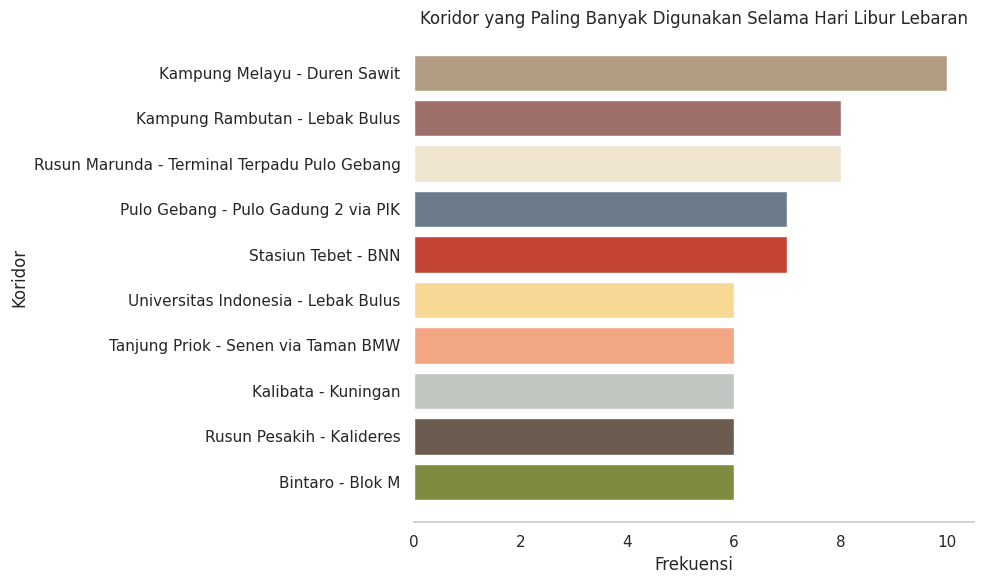

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define earth-tone colors
earth_tone_colors = ['#7f8c3f', '#6c5b4f', '#c0c7c0', '#f3a683', '#f7d794',
                     '#c44536', '#6c7a8c', '#f0e5cf', '#9f6f6c', '#b19c83']

# Sort and select the top 10 corridors
holyday_corridor2_sorted = holyday_corridor2.sort_values(by='Count', ascending=True).tail(10)

# Use a colormap from the defined earth-tone colors
num_bars = len(holyday_corridor2_sorted)
colors = earth_tone_colors[-num_bars:]  # Ensure colors match the number of bars

plt.figure(figsize=(10, 6))

bars = plt.barh(holyday_corridor2_sorted['corridorName'], holyday_corridor2_sorted['Count'], color=colors)

plt.xlabel('Frekuensi')
plt.ylabel('Koridor')
plt.title('Koridor yang Paling Banyak Digunakan Selama Hari Libur Lebaran')
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

dari diagram diatas, didapatkan bahwa:
- terdapat perbedaan akses koridor meski lebaran jatuh pada akhir pekan
- setela dianalisis lebih lanjut, koridor yang menjadi top pick saat libur lebaran ini terinegrasi dengan layanan lain, serta aksesibilitas terhadap wilayah-wilayah lainya yang dapat menjadi point penting bagi pengguna dalam pemilihan koridor. diantaranya:
    - Kampung Melayu,
    - Kampung Rambutan,
    - Te rminal Pulo Gadung,
    - Stasiun Tebet, dll.

# Menjawab Pertanyaan

1. Menjawab pertanyaan pertama<br>
    
    **Bagaimana karakteristik penumpang Transjakarta beserta pola penggunaan pelayanan transportasi transjakarta?**

  - Distribusi data berdasarkan Jenis Kelamin <br>
  Dari data jenis kelamin, diketahui bahwa pengguna layanan TransJakarta perempuan mencapai 53,2% dari total penumpang, sementara penumpang laki-laki sebesar 46,7%. Hal ini mencerminkan dominasi jumlah penumpang perempuan dalam penggunaan layanan transportasi ini, memperlihatkan mobilitas yang tinggi di kalangan perempuan dalam aktivitas sehari-hari dan menekankan pentingnya penyediaan fasilitas dan layanan yang responsif terhadap kebutuhan khusus perempuan.

  - Distribusi data berdasarkan Usia<br>
  Data distribusi pengguna layanan TransJakarta berdasarkan usia menunjukkan bahwa mayoritas penumpang adalah kelompok dewasa, yang mencapai 79,3% dari total pengguna. Kelompok remaja juga memberikan kontribusi signifikan sebesar 16,5%. Sementara itu, anak-anak dan lansia masing-masing hanya menyumbang 2% dari total penumpang. Data ini menggambarkan bahwa layanan TransJakarta paling banyak digunakan oleh orang dewasa dan remaja, sedangkan pengguna dari kelompok anak-anak dan lansia cenderung lebih sedikit.

  - Distribusi data berdasarkan pola Moda Transportasi <br>
  Data distribusi pengguna layanan TransJakarta berdasarkan moda transportasi sebanyak 35404 pada april 2023 menunjukkan bahwa mayoritas pengguna, yaitu 54%, menggunakan layanan Transjakarta sebagai pilihan utama mereka. Jaklingko menempati urutan kedua dengan 37% pengguna, yang mencerminkan popularitas dan pentingnya layanan ini sebagai alternatif transportasi yang signifikan. RoyalTrans dan Transjabodetabek masing-masing melayani 5% dan 4% pengguna, menunjukkan bahwa meskipun kontribusinya lebih kecil, mereka tetap menjadi pilihan bagi sebagian penumpang. Angkutan Wisata, dengan persentase 1%, menunjukkan penggunaan yang lebih terbatas, mungkin karena layanan ini bersifat khusus atau musiman. Data ini memberikan gambaran yang jelas tentang preferensi moda transportasi di kalangan pengguna TransJakarta dan pentingnya setiap layanan dalam ekosistem transportasi umum di Jakarta.

  - Distribusi data pola layanan transportasi berdasarkan layanan Hari dan Jam
    - Berdasarkan heatmap diatas, dapat dikategorikan waktu sibuk penggunaan transjakarta kedalam dua kategori yaitu:
    - Morning rush hour= pada pukul 5am-9am, dengan peak hour pada pukul 6am
    - Evening rush hour= pada pukul 4pm-21pm, dengan peak hour di pukul 5 pm
    - Rush Hour tersebut dapat terjadi karena merupakan jam mobilitas berangkat dan pulang kerja bagi seebagian pegawai.
    - Koridor 1T atau cibubur-balai kota menjadi  koridor tersibuk ditiap rush hour karena berada diwilayah perkantoran dengan persentase 22,44%.

  - Distribusi data berdasarkan pola Pengguna Layanan Rute Bus Pink <br>
  Dari data rute bus Pink di atas menunjukkan Koridor **Ciledug - Tendean** memiliki persentase pelayanan penumpang perempuan tertinggi sebesar 45,2%, menunjukkan dominasi wanita tertinggi dalam penggunaan layanan Bus Pink di koridor ini cukup banyak. Dilanjutkan dengan koridor **PGC - Juanda** sebesar 33,6%, **Kalideres - Bundaran HI via Veteran** sebesar 32,5%, dan Pulo Gadung - Monas sebesar 32,8%. Koridor dengan persentase terendah adalah **Pinang Ranti - Pluit** dengan hanya 1,4% penumpang perempuan, menandakan bahwa rute ini kurang dimanfaatkan oleh penumpang perempuan.

  - Distribusi data berdasarkan Pola Pengguna layananan transjakarta pada 5 koridor dengan jumlah pengguna Perempuan tertinggi <br>
  Berdasarkan data di atas, **Pasar Minggu - Tanah Abang** menjadi koridor dengan jumlah penumpang perempuan tertinggi, sebanyak **220 penumpang**, yang mencakup **21,3%** dari total pengguna koridor tersebut. Dilanjutkan dengan **Poris Plawad - Bundaran Senayan**, yang memiliki **213 penumpang** perempuan atau sekitar **20,6%** dari total pengguna. Selanjutnya, **Rusun Rawa Bebek - Kodamar** berada di posisi ketiga dengan **209 penumpang** perempuan, mewakili **20,2%** dari total pengguna koridor ini. **Terminal Tanah Merah - Pulo Gadung** mengikuti di urutan keempat dengan **196 penumpang** perempuan, yang mencakup **19,0%** dari keseluruhan penumpang di koridor tersebut. Terakhir, **Cilangkap - Cililitan** berada di posisi kelima dengan **195 penumpang** perempuan, setara dengan **18,9%** dari total penumpang koridor ini.<br><br>
2. Menjawab pertanyaan kedua; <br>
    **Bagaimana persentase penumpang perempuan pada layanan Bus Pink dibandingkan dengan layanan umum TransJakarta di rute Pasar Minggu - Tanah Abang dan Ciledug - Tendean?**<br><br>
Berdasarkan data yang telah diberikan, persentase penumpang perempuan pada layanan Bus Pink di rute dengan persentase tertinggi (Koridor Ciledug - Tendean) adalah 45,2%.
Sementara itu, pada layanan umum TransJakarta, rute Pasar Minggu - Tanah Abang memiliki jumlah penumpang perempuan tertinggi sebanyak 220 penumpang, yang hanya mencakup 21,3% dari total pengguna di rute tersebut.
Dari perbandingan ini, terlihat bahwa persentase penumpang perempuan pada layanan Bus Pink di koridor dengan persentase tertinggi jauh lebih tinggi dibandingkan dengan rute Pasar Minggu - Tanah Abang pada layanan umum TransJakarta.<br><br>
3. Menjawab pertanyaan ketiga;<br>
    **Apakah penempatan Bus Pink Transjakarta dan Bus transjakarta telah  mengakomodir aksesibilitas Perempuan?**<br><br>
Koridor dengan Jumlah Penumpang Perempuan Tertinggi:
Pada layanan umum TransJakarta, koridor Pasar Minggu - Tanah Abang memiliki jumlah penumpang perempuan tertinggi sebanyak 220 penumpang (21,3% dari total pengguna), diikuti oleh Poris Plawad - Bundaran Senayan (213 penumpang, 20,6%), dan Rusun Rawa Bebek - Kodamar (209 penumpang, 20,2%),yang merupakan koridor pengguna perempuan tertinggi namun tidak mendapatkan rute Bus Pink.
Meskipun jumlah absolut penumpang perempuan tinggi, persentase pengguna perempuan terhadap total pengguna masih lebih rendah dibandingkan dengan rute Bus Pink.<br><br>
Hal yang terjadi sebaliknya pada rute yang menjadi rute bus pink arah Ciledug - Tendean memiliki persentase penumpang perempuan tertinggi, yaitu sebesar 45,2%, yang menandakan dominasi wanita dalam penggunaan layanan di koridor ini. Namun pada rute PGC - Juanda (33,6%), Kalideres - Bundaran HI via Veteran (32,5%), dan Pulo Gadung - Monas (32,8%), memperlihatkan koridor ini masih didominasi sebagian besar oleh laki-laki.
Ketidaksesuaian Antara Layanan Bus Pink dan Kebutuhan:
Koridor-koridor dengan jumlah penumpang perempuan tertinggi di layanan umum (seperti Pasar Minggu - Tanah Abang) tidak tercakup dalam rute Bus Pink. Hal ini menunjukkan bahwa layanan Bus Pink tidak ditempatkan di rute-rute di mana jumlah pengguna perempuan sangat tinggi, yang berarti ada potensi ketidakcocokan antara penawaran layanan dan kebutuhan perempuan.


Dengan demikian dapat dikatakan penempatan Bus Pink TransJakarta dan layanan umum TransJakarta saat ini belum sepenuhnya mengakomodasi aksesibilitas perempuan.


# Kesimpulan dan Rekomendasi

## Kesimpulan

Berdasarkan analisis data,
1. Pengguna layanan TransJakarta perempuan mencapai 53,2% dari total penumpang, selebihnya adalah laki-laki.
2. Terdapat ketidaksesuaian antara penempatan rute Bus Pink TransJakarta dengan kebutuhan mobilitas perempuan.
3. Ada potensi ketidakcocokan antara penawaran layanan dan kebutuhan perempuan.Ini menunjukkan bahwa Bus Pink belum sepenuhnya optimal dalam menjangkau rute-rute yang benar-benar dibutuhkan oleh perempuan, terutama dalam koridor dengan aktivitas tinggi yang relevan bagi mereka.


## Rekomendasi

1. **Evaluasi Penempatan Rute Bus Pink**: <br>Pemerintah dan manajemen TransJakarta perlu mengevaluasi kembali penempatan rute Bus Pink agar lebih selaras dengan rute-rute yang memiliki jumlah penumpang perempuan tinggi di layanan umum. Rute seperti Pasar Minggu - Tanah Abang sebaiknya dipertimbangkan untuk penambahan layanan Bus Pink.
2. **Penelitian Lebih Lanjut:** Diperlukan penelitian lebih lanjut untuk memahami kebutuhan mobilitas perempuan di berbagai koridor, terutama di rute yang belum tercakup oleh Bus Pink, guna mengidentifikasi faktor-faktor yang mempengaruhi preferensi rute dan waktu perjalanan mereka.
3. **Peningkatan Sosialisasi dan Fasilitas:** Sosialisasi mengenai manfaat dan keamanan Bus Pink perlu ditingkatkan, serta penambahan fasilitas pendukung di halte-halte yang strategis untuk meningkatkan kenyamanan dan kepercayaan perempuan dalam menggunakan layanan ini.
4. **Perluasan Jangkauan Bus Pink:** Mengingat pentingnya aksesibilitas bagi perempuan, terutama di daerah dengan aktivitas tinggi seperti pusat bisnis dan perbelanjaan, perlu dipertimbangkan perluasan jangkauan Bus Pink ke koridor-koridor yang memiliki potensi tinggi pengguna perempuan tetapi belum terlayani secara optimal.
5. **Penyediaan informasi lebih lanjut terkait jumlah armada:** Mengingat pentingnya dilakukan penelitian efektivitas layanan berdasarkan tujuan dari layanan yang diberikan, PT. Transjakarta dapat  yang dioperasikan untuk setiap rute
